In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
df = adult.data.features 
y  = adult.data.targets.to_numpy() 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [62]:
# df = pd.read_csv('adult.data')
# df.head()

In [63]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.histplot(df['charges'], kde=True)  # kde=True adds the Gaussian-like curve
# plt.title('Distribution of Insurance Charges')
# plt.xlabel('Charges')
# plt.ylabel('Frequency')

# # Find and mark the median
# median_charges = df['charges'].median()
# plt.axvline(median_charges, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_charges:.2f}')
# plt.legend()
# plt.show()

In [64]:
# df['charges'] = df['charges'].apply(lambda x: 1 if x >= 10000 else 0)
# df

In [65]:
# df['region'].value_counts()

In [66]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [67]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object),
 array([24720, 12435,  7841,  3846]))

In [68]:
y = list(y)
for i in range(len(y)):
    if y[i] == '<=50K' or y[i] == '<=50K.':
        y[i] = 0
    else:
        y[i] = 1
        
y = np.array(y)
np.unique(y)

array([0, 1])

In [69]:
df['income'] = y
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [70]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace = True)

In [71]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [72]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

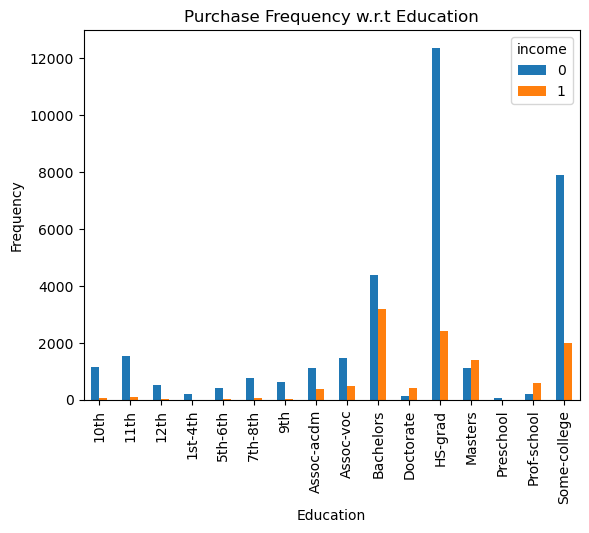

In [73]:
pd.crosstab(df.education,df.income).plot(kind='bar')
plt.title('Purchase Frequency w.r.t Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [74]:
cat_cols = ['workclass', 'education', 'marital', \
            'occupation', 'relationship', 'race', 'sex', 'country']

In [75]:
def one_hot(df, cols): # idk if sklearns one-hot encoder is similar
    """
    df: pandas DataFrame
    param: cols a list of columns to encode
    return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [76]:
def numeric_scaler(df, cols):
    '''
    df: pandas dataframe
    numeric_cols: (array of strings) column names for numeric variables

    no return: does inplace operation
    '''
    df_new = df.copy()
    mmscaler = MinMaxScaler()
    df_new[cols] = mmscaler.fit_transform(df_new[cols])
    return df_new

In [77]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [78]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [79]:
numeric_all = ['age', 'bmi', 'children', 'charges']
# cat_all = ['sex', 'smoker', 'region']
# df_medical_mm = numeric_scaler(df, numeric_all) # minmax scaling for all numeric columns, so all elements in [0,1]
df_medical_mm_oh = one_hot(df, cat_cols)
df_medical_mm_oh.drop(cat_cols, axis = 1, inplace=True) # drop categories that were used to one hot encode
df_medical_mm_oh = df_medical_mm_oh * 1.0 # make bool true, false into 1.0, 0.0

In [80]:
df_medical_mm_oh.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X = df_medical_mm_oh
# X['intercept'] = 1.0
X = X.to_numpy() # now (n, d+1) dimensional, log regression in d+1 is affine in d
X.shape

(45222, 105)

In [82]:
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.80000e+01, 3.74983e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.40000e+01, 8.38910e+04, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.50000e+01, 1.82148e+05, 1.30000e+01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [83]:
def normalize_columns(X):
    # Calculate the L2 norm of each column
    col_norms = np.linalg.norm(X, ord=2, axis=0)
    
    # Find scaling factors where norm > 1
    scaling_factors = np.maximum(col_norms, 1.0)  # Ensures norms <= 1
    
    # Scale columns with their respective factors
    X_normalized = X / scaling_factors
    return X_normalized

In [84]:
X = normalize_columns(X)
X

array([[0.00450039, 0.00167856, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00576973, 0.00180404, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.004385  , 0.00466967, 0.00405558, ..., 0.00492115, 0.        ,
        0.        ],
       ...,
       [0.004385  , 0.00812   , 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00507737, 0.0018166 , 0.00585806, ..., 0.00492115, 0.        ,
        0.        ],
       [0.00403881, 0.00394429, 0.00585806, ..., 0.00492115, 0.        ,
        0.        ]])

In [85]:
np.linalg.norm(X, ord=2, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [86]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X = normalizer.fit_transform(X)

print(X)

[[0.13318725 0.04967615 0.1733669  ... 0.14563953 0.         0.        ]
 [0.20157255 0.06302637 0.20465839 ... 0.17192643 0.         0.        ]
 [0.13934396 0.14838997 0.12887595 ... 0.15638165 0.         0.        ]
 ...
 [0.17040585 0.31555208 0.22765073 ... 0.1912415  0.         0.        ]
 [0.12809796 0.04583144 0.1477943  ... 0.12415687 0.         0.        ]
 [0.11246553 0.10983339 0.16312463 ... 0.13703536 0.         0.        ]]


In [87]:
np.linalg.norm(X)

212.65464960823303

In [88]:
import math
math.sqrt(X.shape[0])

212.65464960823218

In [90]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [91]:
# y = np.where(y == '<=50K', 0, 1)
# y.shape

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=43)
print("Training data x, y shapes", X_train.shape, y_train.shape)
print("Test data x, y shapes", X_test.shape, y_test.shape)

Training data x, y shapes (40699, 105) (40699,)
Test data x, y shapes (4523, 105) (4523,)


In [93]:
# import numpy as np
# import math

# ### Needs a check again

# def sample_l2lap(eta:float, d:int) -> np.array:
#     """
#         Returns
#           d dimensional noise sampled from `L2 laplace'
#           https://math.stackexchange.com/questions/3801271/sampling-from-a-exponentiated-multivariate-distribution-with-l2-norm
#     """
#     R = np.random.gamma(d, scale = 1.0/eta)
#     Z = np.random.normal(0, 1, size = d)
#     return R  * (Z / np.linalg.norm(Z)) #shape is (d,) one dimensional

In [94]:
# dictt = {}
# n = X_train.shape[0]
# n

In [95]:
n, input_dim = X_train.shape[0], X_train.shape[1]
output_dim = 1

#logistic regression class
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=64):
        super(LogisticRegression, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim)
        self.linear2 = torch.nn.Linear(hidden_dim, output_dim)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    #sigmoid transformation of the input
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
#         x = self.relu(x)
        x = self.sigmoid(x)
        return x

In [96]:
# from tqdm import tqdm
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# # Define the linear regression model
# # class LinearRegression(nn.Module):
# #     def __init__(self, input_dim):
# #         super(LinearRegression, self).__init__()
# #         self.linear = nn.Linear(input_dim, 1)

# #     def forward(self, x):
# #         return torch.sigmoid(self.linear(x))

# def train_model(X_train, y_train, eps_p, epochs=1000):

#     # Convert data to PyTorch tensors
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#     y_train = np.array(y_train)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)


#     # Initialize the model, loss function, and optimizer
# #     model = LogisticRegression(input_dim, output_dim)
#     criterion = nn.BCELoss(reduction='sum') # Binary Cross Entropy Loss for binary classification
    
#     d = X_train.shape[1]
#     lr = 1e-4
    
    
#     theta_init = torch.randn((d,1),requires_grad=True)
#     optimizer = optim.Adam([theta_init], lr=lr)
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

# #     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
#     b = np.random.gamma(d, scale=1.0 / eta, size=(theta_init, 1))
#     b = torch.Tensor(b.reshape(1, -1))

#     # Training loop
#     for epoch in tqdm(range(epochs), desc='Training'):
#         model.train()
#         epoch_loss = 0.0

#         for batch_X, batch_y in data_loader:
#             optimizer.zero_grad()

#             # Forward pass
# #             outputs = model(batch_X)
# #             theta = torch.cat([p.flatten() for p in model.parameters()])

            
#             y_hat_init = torch.matmul(batch_X, theta_init.float())
#             outputs = torch.nn.Sigmoid(y_hat_init)
            
            

#             # Add perturbation
#             pert = torch.dot(b.flatten(), theta.flatten())

#             # Calculate the loss
#             loss = (
#                 criterion(outputs, batch_y)
#                 + pert
#                 + ((Lamb + Delta) * (torch.norm(theta_init, p=2) ** 2))
#             )
#             epoch_loss += loss.item()

#             # Backward and optimize
#             loss.backward()
#             optimizer.step()

#         # Logging training loss
#         if (epoch + 1) % 20 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}')

#     return model

In [97]:
# import optuna

# def objective(trial, X, y):
#     # Define the hyperparameter search space
#     learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-1, log=True)
# #     eta = trial.suggest_float('eta', 0.1, 10.0, log=True)
#     epochs = trial.suggest_int('epochs', 1, 1000)
    
#     # Split data into train and validation sets
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    
#     try:
#         # Train the model with suggested hyperparameters
#         model = train_model(
#             X_train=X_train,
#             y_train=y_train,
#             eps_p=np.inf,
#             epochs=epochs
#         )
        
#         # Update the model's optimizer with suggested learning rate and weight decay
#         model.optimizer = torch.optim.Adam(
#             model.parameters(),
#             lr=learning_rate
#         )
        
#         # Evaluate on validation set
#         with torch.no_grad():
#             X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
#             val_outputs = model(X_val_tensor)
#             val_predictions = (val_outputs >= 0.5).float().numpy()
#             accuracy = accuracy_score(y_val, val_predictions)
            
#         return accuracy
    
#     except Exception as e:
#         # Return a very low score if training fails
#         print(f"Trial failed with error: {str(e)}")
#         return float('-inf')

# def optimize_hyperparameters(X, y, n_trials=100):
#     study = optuna.create_study(direction='maximize')
    
#     # Create a partial function with fixed X and y
#     objective_with_data = lambda trial: objective(trial, X, y)
    
#     # Run the optimization
#     study.optimize(objective_with_data, n_trials=n_trials)
    
#     print("Best hyperparameters:", study.best_params)
#     print("Best accuracy:", study.best_value)
    
#     return study.best_params, study.best_trial

In [98]:
# from sklearn.metrics import accuracy_score

# Lamb = n

# best_params, best_trial = optimize_hyperparameters(X_train, y_train, n_trials=100)

# # Train final model with best parameters
# final_model = train_model(
#     X_train=X,
#     y_train=y,
#     eps_p=np.inf,
#     epochs=best_params['epochs']
# )
# final_model.optimizer = torch.optim.Adam(
#     final_model.parameters(),
#     lr=best_params['learning_rate']
# )

In [99]:
# from tqdm import tqdm
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# # Define the linear regression model
# # class LinearRegression(nn.Module):
# #     def __init__(self, input_dim):
# #         super(LinearRegression, self).__init__()
# #         self.linear = nn.Linear(input_dim, 1)

# #     def forward(self, x):
# #         return torch.sigmoid(self.linear(x))

# def twostg_train_model(X_train, y_train, eps_p, \
#                        lr, weight_decay, epochs):

#     # Convert data to PyTorch tensors
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#     y_train = np.array(y_train)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)


#     # Initialize the model, loss function, and optimizer
#     model = LogisticRegression(input_dim, output_dim)
#     criterion = nn.BCELoss(reduction='sum') # Binary Cross Entropy Loss for binary classification
#     optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))

# #     patience = 10
# #     scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=1e-3, patience=patience, \
# #                                 verbose=True)


#     # Training loop
    
#     #   b, Lamb, Delta = get_noise_vector(eps_dash_p)
#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)

# #     print("n = ", X_train.shape[0])

#     d = X_train.shape[1]
#     b = np.random.gamma(d, scale=1.0/eta, size=(theta_d,1))
#     #     sample_l2lap(eta, X_train.shape[1])
# #     print(b)
#     b = b.reshape(1, -1)    


#     for epoch in tqdm(range(epochs), desc='Training'):

#         optimizer.zero_grad()
#         # Forward pass
#         outputs = model(X_train_tensor)
#         theta = torch.cat([p.flatten() for p in model.parameters()])
# #         theta = theta.reshape(1, -1)
#         b = torch.Tensor(b)
# #         print(b.shape)
#         #       print(theta.shape)
#         pert = torch.dot(b.flatten(), theta.flatten())
#         #       print(pert)
#         # print(pert[0,0])
#         # print(pert.shape)
#         # if eps_p == 100:
#         #   print(pert[0,0])
#         # Calculate the loss
# #         print(criterion(outputs, y_train_tensor))
#         loss = criterion(outputs, y_train_tensor) \
#             + pert \
#             + ((Lamb + Delta) * (torch.norm(theta, p=2)**2))

#         # Backward and optimize
#         loss.backward()
#         optimizer.step()

#         if (epoch+1) % 20 == 0:
# #             print(criterion(outputs, y_train_tensor))
# #             print((Lamb + Delta) * (torch.norm(theta, p=2)**2))
#             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}')

#     return model

In [100]:
# class LogisticRegression(torch.nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LogisticRegression, self).__init__()
#         self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
#         self.sigmoid = torch.nn.Sigmoid()  # Define sigmoid as a class member

#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.sigmoid(x)  # Apply sigmoid to bound outputs between 0 and 1
#         return x
    
#     def get_parameters(self):
#         return next(self.parameters())   

In [101]:
class LogReg(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
        self.sigmoid = torch.nn.Sigmoid()  # Define sigmoid as a class member

    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)  # Apply sigmoid to bound outputs between 0 and 1
        return x  

In [122]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np

def sigmoid(x):
    
    # Compute sigmoid: 1 / (1 + e^(-x))
    return 1 / (1 + torch.exp(-x))


def twostg_train_model(X_train, y_train, eps_p, lr, epochs, Lamb, batch_size=128):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train = np.array(y_train)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

    # Create DataLoader for batch processing
#     dataset = TensorDataset(X_train_tensor, y_train_tensor)
#     data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # Initialize the model, loss function, and optimizer
    n, d =  X_train.shape[0], X_train.shape[1]
    
    model = LogReg(d, 1)
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    
    
    theta_init = torch.randn((d,1),requires_grad=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / (n * Lamb))))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / (6 * math.sqrt(n))

#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
    b = np.random.gamma(d, scale=1.0 / eta, size=(d+1, 1))
    b = torch.Tensor(b.reshape(1, -1))
    
    
    # Training loop
    for epoch in tqdm(range(epochs), desc='Training'):
        model.train()
        
   #         for batch_X, batch_y in data_loader:
        optimizer.zero_grad()

        # Forward pass
#             outputs = model(batch_X)

#         y_hat_init = 
        outputs = model(X_train_tensor)
# #             print(y_hat_init.shape)
#         outputs = sigmoid(y_hat_init.flatten())
#             outputs = model(X_batch)

        theta = torch.cat([p.flatten() for p in model.parameters()])
#         theta = model.get_parameters().view(-1)  # Get current parameters
#         theta = theta_init

#         print(theta)



        # Add perturbation
        pert = (1 / n) * torch.dot(b.flatten(), theta.flatten())
#         print(pert)

        # Calculate the loss
        loss = (
            criterion(outputs.flatten(), y_train_tensor.flatten())
            + pert
            + ((Lamb + Delta) * (torch.norm(theta, p=2) ** 2))
        )

        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Logging training loss
#         if (epoch + 1) % 10 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}')

        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
#                 model.eval()
                train_pred = model(X_train_tensor)
#                 (torch.matmul(X_train_tensor, theta_init.float()) >= 0.5).float()
#                 test_pred = (model(X_test_tensor) >= 0.5).float()
                train_pred_cls = train_pred.round()
                train_acc = (train_pred_cls == y_train_tensor).float().mean()
#                 test_acc = (test_pred == y_test_tensor).float().mean()
                print(f'Epoch [{epoch+1}/{epochs}], '
                      f'Loss: {loss.item():.4f}, '
                      f'Train Acc: {train_acc:.4f}, ')
#                       f'Test Acc: {test_acc:.4f}')

    return model

In [162]:
dqs, accs = {}, {}
float_preds_list, preds_list = [], []
# 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5,
n = X_train.shape[0]
# k = 1
Lamb = 0.0001
# [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]
# 0.1, 0.5, 1, 3, 5, 10, 
for eps_p in [np.inf]:
    dq_list, acc_list = [], []
    for _ in range(1):


#         model = twostg_train_model(X_train, y_train, eps_p, \
#                                    lr=best_params['learning_rate'], \
#                                    weight_decay=best_params['weight_decay'], \
#                                    epochs=100)

        model_trained = twostg_train_model(
                X_train=X_train,
                y_train=y_train,
                eps_p=eps_p,
                lr=1e-3,
                epochs=10000,
                Lamb=Lamb,
            )
    
        print(model_trained.parameters())
    
        X_test, y_test = X_test[:1000], y_test[:1000]
        print(np.unique(y_test))


        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test = np.array(y_test)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


        # Evaluation
        with torch.no_grad():
            # predicted = model(X_test_tensor)
            # predicted_labels = (predicted > 0.5).float() # Convert probabilities to binary predictions
            # accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
            # print(f'Eps_p = {eps_p} -- Accuracy on test set: {accuracy:.4f}')

            y_predicted = model_trained(X_test_tensor)
#                 X_test_tensor, theta_trained.float())
            y_predicted_cls = y_predicted.round()
            print(np.unique(y_predicted_cls))
            acc = y_predicted_cls.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
            acc_list.append(acc)
            print(f'accuracy: {acc.item():.4f}')


#         print(y_test_tensor)
        # dictt[f"{eps_p}"] = predicted_labels
        preds_list.append(np.array(y_predicted_cls))
        float_preds_list.append(np.array(y_predicted))
        
#         print(y_predicted_cls)

#         z_star = run_opt(np.array(y_predicted))

#         dq = np.dot(z_star.flatten(), y_test)
#         dq_list.append(dq)
        
        
#     dqs[f'{eps_p}'] = np.mean(dq_list)
#     accs[f'{eps_p}'] = np.mean(acc_list)

Training:   1%|▏                            | 70/10000 [00:00<00:34, 286.31it/s]

Epoch [10/10000], Loss: 0.7050, Train Acc: 0.3084, 
Epoch [20/10000], Loss: 0.6946, Train Acc: 0.5074, 
Epoch [30/10000], Loss: 0.6846, Train Acc: 0.6746, 
Epoch [40/10000], Loss: 0.6750, Train Acc: 0.7404, 
Epoch [50/10000], Loss: 0.6658, Train Acc: 0.7651, 
Epoch [60/10000], Loss: 0.6571, Train Acc: 0.7708, 
Epoch [70/10000], Loss: 0.6488, Train Acc: 0.7709, 


Training:   1%|▍                           | 139/10000 [00:00<00:30, 321.24it/s]

Epoch [80/10000], Loss: 0.6408, Train Acc: 0.7696, 
Epoch [90/10000], Loss: 0.6332, Train Acc: 0.7680, 
Epoch [100/10000], Loss: 0.6259, Train Acc: 0.7672, 
Epoch [110/10000], Loss: 0.6189, Train Acc: 0.7665, 
Epoch [120/10000], Loss: 0.6122, Train Acc: 0.7664, 
Epoch [130/10000], Loss: 0.6057, Train Acc: 0.7660, 
Epoch [140/10000], Loss: 0.5995, Train Acc: 0.7658, 
Epoch [150/10000], Loss: 0.5936, Train Acc: 0.7657, 


Training:   2%|▋                           | 227/10000 [00:00<00:25, 385.00it/s]

Epoch [160/10000], Loss: 0.5878, Train Acc: 0.7660, 
Epoch [170/10000], Loss: 0.5822, Train Acc: 0.7662, 
Epoch [180/10000], Loss: 0.5769, Train Acc: 0.7667, 
Epoch [190/10000], Loss: 0.5716, Train Acc: 0.7670, 
Epoch [200/10000], Loss: 0.5666, Train Acc: 0.7675, 
Epoch [210/10000], Loss: 0.5617, Train Acc: 0.7679, 
Epoch [220/10000], Loss: 0.5570, Train Acc: 0.7684, 
Epoch [230/10000], Loss: 0.5524, Train Acc: 0.7691, 
Epoch [240/10000], Loss: 0.5480, Train Acc: 0.7700, 
Epoch [250/10000], Loss: 0.5437, Train Acc: 0.7706, 


Training:   3%|▉                           | 313/10000 [00:00<00:23, 405.40it/s]

Epoch [260/10000], Loss: 0.5395, Train Acc: 0.7720, 
Epoch [270/10000], Loss: 0.5354, Train Acc: 0.7738, 
Epoch [280/10000], Loss: 0.5315, Train Acc: 0.7758, 
Epoch [290/10000], Loss: 0.5276, Train Acc: 0.7776, 
Epoch [300/10000], Loss: 0.5239, Train Acc: 0.7789, 
Epoch [310/10000], Loss: 0.5203, Train Acc: 0.7802, 
Epoch [320/10000], Loss: 0.5167, Train Acc: 0.7813, 
Epoch [330/10000], Loss: 0.5133, Train Acc: 0.7819, 
Epoch [340/10000], Loss: 0.5100, Train Acc: 0.7828, 


Training:   4%|█                           | 401/10000 [00:01<00:22, 419.77it/s]

Epoch [350/10000], Loss: 0.5067, Train Acc: 0.7836, 
Epoch [360/10000], Loss: 0.5035, Train Acc: 0.7848, 
Epoch [370/10000], Loss: 0.5005, Train Acc: 0.7857, 
Epoch [380/10000], Loss: 0.4974, Train Acc: 0.7865, 
Epoch [390/10000], Loss: 0.4945, Train Acc: 0.7873, 
Epoch [400/10000], Loss: 0.4916, Train Acc: 0.7881, 
Epoch [410/10000], Loss: 0.4888, Train Acc: 0.7891, 
Epoch [420/10000], Loss: 0.4861, Train Acc: 0.7902, 
Epoch [430/10000], Loss: 0.4835, Train Acc: 0.7915, 
Epoch [440/10000], Loss: 0.4809, Train Acc: 0.7926, 


Training:   5%|█▎                          | 491/10000 [00:01<00:27, 347.84it/s]

Epoch [450/10000], Loss: 0.4783, Train Acc: 0.7936, 
Epoch [460/10000], Loss: 0.4758, Train Acc: 0.7943, 
Epoch [470/10000], Loss: 0.4734, Train Acc: 0.7947, 
Epoch [480/10000], Loss: 0.4710, Train Acc: 0.7957, 
Epoch [490/10000], Loss: 0.4687, Train Acc: 0.7968, 


Training:   5%|█▍                          | 529/10000 [00:01<00:30, 314.29it/s]

Epoch [500/10000], Loss: 0.4665, Train Acc: 0.7980, 
Epoch [510/10000], Loss: 0.4642, Train Acc: 0.7990, 
Epoch [520/10000], Loss: 0.4621, Train Acc: 0.8001, 
Epoch [530/10000], Loss: 0.4599, Train Acc: 0.8010, 
Epoch [540/10000], Loss: 0.4578, Train Acc: 0.8025, 


Training:   6%|█▋                          | 610/10000 [00:01<00:27, 342.62it/s]

Epoch [550/10000], Loss: 0.4558, Train Acc: 0.8038, 
Epoch [560/10000], Loss: 0.4538, Train Acc: 0.8051, 
Epoch [570/10000], Loss: 0.4518, Train Acc: 0.8068, 
Epoch [580/10000], Loss: 0.4499, Train Acc: 0.8083, 
Epoch [590/10000], Loss: 0.4480, Train Acc: 0.8093, 
Epoch [600/10000], Loss: 0.4462, Train Acc: 0.8105, 
Epoch [610/10000], Loss: 0.4444, Train Acc: 0.8113, 
Epoch [620/10000], Loss: 0.4426, Train Acc: 0.8121, 
Epoch [630/10000], Loss: 0.4408, Train Acc: 0.8128, 


Training:   7%|█▉                          | 692/10000 [00:01<00:25, 370.05it/s]

Epoch [640/10000], Loss: 0.4391, Train Acc: 0.8137, 
Epoch [650/10000], Loss: 0.4374, Train Acc: 0.8142, 
Epoch [660/10000], Loss: 0.4358, Train Acc: 0.8150, 
Epoch [670/10000], Loss: 0.4342, Train Acc: 0.8156, 
Epoch [680/10000], Loss: 0.4326, Train Acc: 0.8159, 
Epoch [690/10000], Loss: 0.4310, Train Acc: 0.8166, 
Epoch [700/10000], Loss: 0.4294, Train Acc: 0.8174, 
Epoch [710/10000], Loss: 0.4279, Train Acc: 0.8182, 
Epoch [720/10000], Loss: 0.4264, Train Acc: 0.8191, 


Training:   8%|██▏                         | 775/10000 [00:02<00:23, 386.30it/s]

Epoch [730/10000], Loss: 0.4250, Train Acc: 0.8196, 
Epoch [740/10000], Loss: 0.4235, Train Acc: 0.8201, 
Epoch [750/10000], Loss: 0.4221, Train Acc: 0.8209, 
Epoch [760/10000], Loss: 0.4207, Train Acc: 0.8216, 
Epoch [770/10000], Loss: 0.4193, Train Acc: 0.8226, 
Epoch [780/10000], Loss: 0.4179, Train Acc: 0.8228, 
Epoch [790/10000], Loss: 0.4166, Train Acc: 0.8232, 
Epoch [800/10000], Loss: 0.4153, Train Acc: 0.8241, 
Epoch [810/10000], Loss: 0.4140, Train Acc: 0.8246, 


Training:   9%|██▍                         | 865/10000 [00:02<00:22, 412.61it/s]

Epoch [820/10000], Loss: 0.4127, Train Acc: 0.8253, 
Epoch [830/10000], Loss: 0.4115, Train Acc: 0.8256, 
Epoch [840/10000], Loss: 0.4102, Train Acc: 0.8260, 
Epoch [850/10000], Loss: 0.4090, Train Acc: 0.8266, 
Epoch [860/10000], Loss: 0.4078, Train Acc: 0.8271, 
Epoch [870/10000], Loss: 0.4066, Train Acc: 0.8276, 
Epoch [880/10000], Loss: 0.4054, Train Acc: 0.8281, 
Epoch [890/10000], Loss: 0.4043, Train Acc: 0.8283, 
Epoch [900/10000], Loss: 0.4031, Train Acc: 0.8287, 


Training:  10%|██▋                        | 1002/10000 [00:02<00:20, 438.45it/s]

Epoch [910/10000], Loss: 0.4020, Train Acc: 0.8292, 
Epoch [920/10000], Loss: 0.4009, Train Acc: 0.8300, 
Epoch [930/10000], Loss: 0.3998, Train Acc: 0.8305, 
Epoch [940/10000], Loss: 0.3987, Train Acc: 0.8312, 
Epoch [950/10000], Loss: 0.3977, Train Acc: 0.8317, 
Epoch [960/10000], Loss: 0.3966, Train Acc: 0.8322, 
Epoch [970/10000], Loss: 0.3956, Train Acc: 0.8329, 
Epoch [980/10000], Loss: 0.3946, Train Acc: 0.8333, 
Epoch [990/10000], Loss: 0.3935, Train Acc: 0.8338, 
Epoch [1000/10000], Loss: 0.3925, Train Acc: 0.8344, 


Training:  11%|██▉                        | 1100/10000 [00:02<00:19, 460.60it/s]

Epoch [1010/10000], Loss: 0.3915, Train Acc: 0.8349, 
Epoch [1020/10000], Loss: 0.3906, Train Acc: 0.8352, 
Epoch [1030/10000], Loss: 0.3896, Train Acc: 0.8356, 
Epoch [1040/10000], Loss: 0.3887, Train Acc: 0.8359, 
Epoch [1050/10000], Loss: 0.3877, Train Acc: 0.8362, 
Epoch [1060/10000], Loss: 0.3868, Train Acc: 0.8366, 
Epoch [1070/10000], Loss: 0.3859, Train Acc: 0.8368, 
Epoch [1080/10000], Loss: 0.3850, Train Acc: 0.8372, 
Epoch [1090/10000], Loss: 0.3841, Train Acc: 0.8375, 
Epoch [1100/10000], Loss: 0.3832, Train Acc: 0.8378, 


Training:  12%|███▏                       | 1198/10000 [00:03<00:18, 472.80it/s]

Epoch [1110/10000], Loss: 0.3823, Train Acc: 0.8380, 
Epoch [1120/10000], Loss: 0.3814, Train Acc: 0.8383, 
Epoch [1130/10000], Loss: 0.3806, Train Acc: 0.8385, 
Epoch [1140/10000], Loss: 0.3797, Train Acc: 0.8388, 
Epoch [1150/10000], Loss: 0.3789, Train Acc: 0.8394, 
Epoch [1160/10000], Loss: 0.3780, Train Acc: 0.8398, 
Epoch [1170/10000], Loss: 0.3772, Train Acc: 0.8403, 
Epoch [1180/10000], Loss: 0.3764, Train Acc: 0.8408, 
Epoch [1190/10000], Loss: 0.3756, Train Acc: 0.8412, 
Epoch [1200/10000], Loss: 0.3748, Train Acc: 0.8418, 


Training:  13%|███▍                       | 1293/10000 [00:03<00:18, 465.65it/s]

Epoch [1210/10000], Loss: 0.3740, Train Acc: 0.8425, 
Epoch [1220/10000], Loss: 0.3732, Train Acc: 0.8427, 
Epoch [1230/10000], Loss: 0.3725, Train Acc: 0.8431, 
Epoch [1240/10000], Loss: 0.3717, Train Acc: 0.8435, 
Epoch [1250/10000], Loss: 0.3709, Train Acc: 0.8441, 
Epoch [1260/10000], Loss: 0.3702, Train Acc: 0.8447, 
Epoch [1270/10000], Loss: 0.3694, Train Acc: 0.8454, 
Epoch [1280/10000], Loss: 0.3687, Train Acc: 0.8457, 
Epoch [1290/10000], Loss: 0.3680, Train Acc: 0.8459, 
Epoch [1300/10000], Loss: 0.3672, Train Acc: 0.8465, 


Training:  14%|███▋                       | 1387/10000 [00:03<00:18, 462.39it/s]

Epoch [1310/10000], Loss: 0.3665, Train Acc: 0.8469, 
Epoch [1320/10000], Loss: 0.3658, Train Acc: 0.8472, 
Epoch [1330/10000], Loss: 0.3651, Train Acc: 0.8477, 
Epoch [1340/10000], Loss: 0.3644, Train Acc: 0.8479, 
Epoch [1350/10000], Loss: 0.3637, Train Acc: 0.8484, 
Epoch [1360/10000], Loss: 0.3631, Train Acc: 0.8490, 
Epoch [1370/10000], Loss: 0.3624, Train Acc: 0.8494, 
Epoch [1380/10000], Loss: 0.3617, Train Acc: 0.8498, 
Epoch [1390/10000], Loss: 0.3610, Train Acc: 0.8501, 
Epoch [1400/10000], Loss: 0.3604, Train Acc: 0.8506, 


Training:  15%|████                       | 1482/10000 [00:03<00:18, 460.16it/s]

Epoch [1410/10000], Loss: 0.3597, Train Acc: 0.8510, 
Epoch [1420/10000], Loss: 0.3591, Train Acc: 0.8515, 
Epoch [1430/10000], Loss: 0.3584, Train Acc: 0.8520, 
Epoch [1440/10000], Loss: 0.3578, Train Acc: 0.8523, 
Epoch [1450/10000], Loss: 0.3572, Train Acc: 0.8525, 
Epoch [1460/10000], Loss: 0.3566, Train Acc: 0.8528, 
Epoch [1470/10000], Loss: 0.3559, Train Acc: 0.8531, 
Epoch [1480/10000], Loss: 0.3553, Train Acc: 0.8533, 
Epoch [1490/10000], Loss: 0.3547, Train Acc: 0.8536, 
Epoch [1500/10000], Loss: 0.3541, Train Acc: 0.8539, 


Training:  16%|████▎                      | 1580/10000 [00:03<00:17, 472.01it/s]

Epoch [1510/10000], Loss: 0.3535, Train Acc: 0.8541, 
Epoch [1520/10000], Loss: 0.3529, Train Acc: 0.8543, 
Epoch [1530/10000], Loss: 0.3523, Train Acc: 0.8545, 
Epoch [1540/10000], Loss: 0.3517, Train Acc: 0.8547, 
Epoch [1550/10000], Loss: 0.3511, Train Acc: 0.8549, 
Epoch [1560/10000], Loss: 0.3506, Train Acc: 0.8553, 
Epoch [1570/10000], Loss: 0.3500, Train Acc: 0.8555, 
Epoch [1580/10000], Loss: 0.3494, Train Acc: 0.8558, 
Epoch [1590/10000], Loss: 0.3489, Train Acc: 0.8560, 
Epoch [1600/10000], Loss: 0.3483, Train Acc: 0.8562, 


Training:  17%|████▌                      | 1677/10000 [00:04<00:17, 476.79it/s]

Epoch [1610/10000], Loss: 0.3478, Train Acc: 0.8563, 
Epoch [1620/10000], Loss: 0.3472, Train Acc: 0.8567, 
Epoch [1630/10000], Loss: 0.3467, Train Acc: 0.8571, 
Epoch [1640/10000], Loss: 0.3461, Train Acc: 0.8572, 
Epoch [1650/10000], Loss: 0.3456, Train Acc: 0.8576, 
Epoch [1660/10000], Loss: 0.3450, Train Acc: 0.8579, 
Epoch [1670/10000], Loss: 0.3445, Train Acc: 0.8581, 
Epoch [1680/10000], Loss: 0.3440, Train Acc: 0.8584, 
Epoch [1690/10000], Loss: 0.3435, Train Acc: 0.8586, 
Epoch [1700/10000], Loss: 0.3429, Train Acc: 0.8587, 


Training:  18%|████▊                      | 1773/10000 [00:04<00:17, 473.39it/s]

Epoch [1710/10000], Loss: 0.3424, Train Acc: 0.8589, 
Epoch [1720/10000], Loss: 0.3419, Train Acc: 0.8592, 
Epoch [1730/10000], Loss: 0.3414, Train Acc: 0.8595, 
Epoch [1740/10000], Loss: 0.3409, Train Acc: 0.8597, 
Epoch [1750/10000], Loss: 0.3404, Train Acc: 0.8599, 
Epoch [1760/10000], Loss: 0.3399, Train Acc: 0.8602, 
Epoch [1770/10000], Loss: 0.3394, Train Acc: 0.8605, 
Epoch [1780/10000], Loss: 0.3389, Train Acc: 0.8608, 
Epoch [1790/10000], Loss: 0.3384, Train Acc: 0.8611, 
Epoch [1800/10000], Loss: 0.3379, Train Acc: 0.8612, 


Training:  18%|████▉                      | 1821/10000 [00:04<00:19, 422.01it/s]

Epoch [1810/10000], Loss: 0.3374, Train Acc: 0.8614, 
Epoch [1820/10000], Loss: 0.3370, Train Acc: 0.8617, 
Epoch [1830/10000], Loss: 0.3365, Train Acc: 0.8618, 
Epoch [1840/10000], Loss: 0.3360, Train Acc: 0.8620, 


Training:  19%|█████▏                     | 1912/10000 [00:04<00:21, 380.23it/s]

Epoch [1850/10000], Loss: 0.3355, Train Acc: 0.8622, 
Epoch [1860/10000], Loss: 0.3351, Train Acc: 0.8625, 
Epoch [1870/10000], Loss: 0.3346, Train Acc: 0.8626, 
Epoch [1880/10000], Loss: 0.3341, Train Acc: 0.8628, 
Epoch [1890/10000], Loss: 0.3337, Train Acc: 0.8630, 
Epoch [1900/10000], Loss: 0.3332, Train Acc: 0.8632, 
Epoch [1910/10000], Loss: 0.3328, Train Acc: 0.8634, 
Epoch [1920/10000], Loss: 0.3323, Train Acc: 0.8637, 
Epoch [1930/10000], Loss: 0.3319, Train Acc: 0.8639, 
Epoch [1940/10000], Loss: 0.3314, Train Acc: 0.8639, 


Training:  20%|█████▍                     | 2008/10000 [00:04<00:18, 424.26it/s]

Epoch [1950/10000], Loss: 0.3310, Train Acc: 0.8642, 
Epoch [1960/10000], Loss: 0.3305, Train Acc: 0.8643, 
Epoch [1970/10000], Loss: 0.3301, Train Acc: 0.8644, 
Epoch [1980/10000], Loss: 0.3297, Train Acc: 0.8646, 
Epoch [1990/10000], Loss: 0.3292, Train Acc: 0.8648, 
Epoch [2000/10000], Loss: 0.3288, Train Acc: 0.8648, 
Epoch [2010/10000], Loss: 0.3284, Train Acc: 0.8650, 
Epoch [2020/10000], Loss: 0.3279, Train Acc: 0.8651, 
Epoch [2030/10000], Loss: 0.3275, Train Acc: 0.8652, 
Epoch [2040/10000], Loss: 0.3271, Train Acc: 0.8655, 


Training:  21%|█████▋                     | 2106/10000 [00:05<00:17, 453.42it/s]

Epoch [2050/10000], Loss: 0.3267, Train Acc: 0.8657, 
Epoch [2060/10000], Loss: 0.3263, Train Acc: 0.8658, 
Epoch [2070/10000], Loss: 0.3258, Train Acc: 0.8659, 
Epoch [2080/10000], Loss: 0.3254, Train Acc: 0.8662, 
Epoch [2090/10000], Loss: 0.3250, Train Acc: 0.8663, 
Epoch [2100/10000], Loss: 0.3246, Train Acc: 0.8665, 
Epoch [2110/10000], Loss: 0.3242, Train Acc: 0.8668, 
Epoch [2120/10000], Loss: 0.3238, Train Acc: 0.8669, 
Epoch [2130/10000], Loss: 0.3234, Train Acc: 0.8670, 
Epoch [2140/10000], Loss: 0.3230, Train Acc: 0.8671, 


Training:  22%|█████▉                     | 2203/10000 [00:05<00:16, 467.05it/s]

Epoch [2150/10000], Loss: 0.3226, Train Acc: 0.8671, 
Epoch [2160/10000], Loss: 0.3222, Train Acc: 0.8673, 
Epoch [2170/10000], Loss: 0.3218, Train Acc: 0.8676, 
Epoch [2180/10000], Loss: 0.3214, Train Acc: 0.8678, 
Epoch [2190/10000], Loss: 0.3210, Train Acc: 0.8679, 
Epoch [2200/10000], Loss: 0.3206, Train Acc: 0.8681, 
Epoch [2210/10000], Loss: 0.3202, Train Acc: 0.8685, 
Epoch [2220/10000], Loss: 0.3199, Train Acc: 0.8687, 
Epoch [2230/10000], Loss: 0.3195, Train Acc: 0.8687, 
Epoch [2240/10000], Loss: 0.3191, Train Acc: 0.8688, 


Training:  23%|██████▏                    | 2301/10000 [00:05<00:16, 475.64it/s]

Epoch [2250/10000], Loss: 0.3187, Train Acc: 0.8691, 
Epoch [2260/10000], Loss: 0.3183, Train Acc: 0.8693, 
Epoch [2270/10000], Loss: 0.3180, Train Acc: 0.8695, 
Epoch [2280/10000], Loss: 0.3176, Train Acc: 0.8698, 
Epoch [2290/10000], Loss: 0.3172, Train Acc: 0.8699, 
Epoch [2300/10000], Loss: 0.3168, Train Acc: 0.8701, 
Epoch [2310/10000], Loss: 0.3165, Train Acc: 0.8703, 
Epoch [2320/10000], Loss: 0.3161, Train Acc: 0.8708, 
Epoch [2330/10000], Loss: 0.3157, Train Acc: 0.8708, 
Epoch [2340/10000], Loss: 0.3154, Train Acc: 0.8711, 


Training:  24%|██████▍                    | 2399/10000 [00:05<00:15, 479.02it/s]

Epoch [2350/10000], Loss: 0.3150, Train Acc: 0.8713, 
Epoch [2360/10000], Loss: 0.3146, Train Acc: 0.8715, 
Epoch [2370/10000], Loss: 0.3143, Train Acc: 0.8718, 
Epoch [2380/10000], Loss: 0.3139, Train Acc: 0.8719, 
Epoch [2390/10000], Loss: 0.3136, Train Acc: 0.8722, 
Epoch [2400/10000], Loss: 0.3132, Train Acc: 0.8724, 
Epoch [2410/10000], Loss: 0.3128, Train Acc: 0.8728, 
Epoch [2420/10000], Loss: 0.3125, Train Acc: 0.8731, 
Epoch [2430/10000], Loss: 0.3121, Train Acc: 0.8734, 
Epoch [2440/10000], Loss: 0.3118, Train Acc: 0.8736, 


Training:  25%|██████▋                    | 2498/10000 [00:05<00:15, 480.55it/s]

Epoch [2450/10000], Loss: 0.3114, Train Acc: 0.8739, 
Epoch [2460/10000], Loss: 0.3111, Train Acc: 0.8741, 
Epoch [2470/10000], Loss: 0.3107, Train Acc: 0.8745, 
Epoch [2480/10000], Loss: 0.3104, Train Acc: 0.8747, 
Epoch [2490/10000], Loss: 0.3100, Train Acc: 0.8751, 
Epoch [2500/10000], Loss: 0.3097, Train Acc: 0.8754, 
Epoch [2510/10000], Loss: 0.3094, Train Acc: 0.8757, 
Epoch [2520/10000], Loss: 0.3090, Train Acc: 0.8761, 
Epoch [2530/10000], Loss: 0.3087, Train Acc: 0.8765, 
Epoch [2540/10000], Loss: 0.3083, Train Acc: 0.8766, 


Training:  26%|███████▏                   | 2648/10000 [00:06<00:14, 490.19it/s]

Epoch [2550/10000], Loss: 0.3080, Train Acc: 0.8770, 
Epoch [2560/10000], Loss: 0.3077, Train Acc: 0.8772, 
Epoch [2570/10000], Loss: 0.3073, Train Acc: 0.8775, 
Epoch [2580/10000], Loss: 0.3070, Train Acc: 0.8777, 
Epoch [2590/10000], Loss: 0.3067, Train Acc: 0.8779, 
Epoch [2600/10000], Loss: 0.3063, Train Acc: 0.8782, 
Epoch [2610/10000], Loss: 0.3060, Train Acc: 0.8786, 
Epoch [2620/10000], Loss: 0.3057, Train Acc: 0.8788, 
Epoch [2630/10000], Loss: 0.3053, Train Acc: 0.8789, 
Epoch [2640/10000], Loss: 0.3050, Train Acc: 0.8791, 


Training:  27%|███████▍                   | 2748/10000 [00:06<00:14, 489.39it/s]

Epoch [2650/10000], Loss: 0.3047, Train Acc: 0.8794, 
Epoch [2660/10000], Loss: 0.3044, Train Acc: 0.8796, 
Epoch [2670/10000], Loss: 0.3040, Train Acc: 0.8799, 
Epoch [2680/10000], Loss: 0.3037, Train Acc: 0.8802, 
Epoch [2690/10000], Loss: 0.3034, Train Acc: 0.8805, 
Epoch [2700/10000], Loss: 0.3031, Train Acc: 0.8808, 
Epoch [2710/10000], Loss: 0.3027, Train Acc: 0.8811, 
Epoch [2720/10000], Loss: 0.3024, Train Acc: 0.8812, 
Epoch [2730/10000], Loss: 0.3021, Train Acc: 0.8815, 
Epoch [2740/10000], Loss: 0.3018, Train Acc: 0.8816, 


Training:  28%|███████▋                   | 2847/10000 [00:06<00:14, 488.41it/s]

Epoch [2750/10000], Loss: 0.3015, Train Acc: 0.8817, 
Epoch [2760/10000], Loss: 0.3012, Train Acc: 0.8819, 
Epoch [2770/10000], Loss: 0.3008, Train Acc: 0.8821, 
Epoch [2780/10000], Loss: 0.3005, Train Acc: 0.8823, 
Epoch [2790/10000], Loss: 0.3002, Train Acc: 0.8825, 
Epoch [2800/10000], Loss: 0.2999, Train Acc: 0.8827, 
Epoch [2810/10000], Loss: 0.2996, Train Acc: 0.8828, 
Epoch [2820/10000], Loss: 0.2993, Train Acc: 0.8830, 
Epoch [2830/10000], Loss: 0.2990, Train Acc: 0.8833, 
Epoch [2840/10000], Loss: 0.2987, Train Acc: 0.8835, 


Training:  29%|███████▉                   | 2945/10000 [00:06<00:14, 487.27it/s]

Epoch [2850/10000], Loss: 0.2984, Train Acc: 0.8838, 
Epoch [2860/10000], Loss: 0.2980, Train Acc: 0.8841, 
Epoch [2870/10000], Loss: 0.2977, Train Acc: 0.8843, 
Epoch [2880/10000], Loss: 0.2974, Train Acc: 0.8844, 
Epoch [2890/10000], Loss: 0.2971, Train Acc: 0.8846, 
Epoch [2900/10000], Loss: 0.2968, Train Acc: 0.8847, 
Epoch [2910/10000], Loss: 0.2965, Train Acc: 0.8848, 
Epoch [2920/10000], Loss: 0.2962, Train Acc: 0.8849, 
Epoch [2930/10000], Loss: 0.2959, Train Acc: 0.8850, 
Epoch [2940/10000], Loss: 0.2956, Train Acc: 0.8851, 


Training:  30%|████████▏                  | 3044/10000 [00:07<00:14, 488.89it/s]

Epoch [2950/10000], Loss: 0.2953, Train Acc: 0.8853, 
Epoch [2960/10000], Loss: 0.2950, Train Acc: 0.8856, 
Epoch [2970/10000], Loss: 0.2947, Train Acc: 0.8858, 
Epoch [2980/10000], Loss: 0.2944, Train Acc: 0.8859, 
Epoch [2990/10000], Loss: 0.2941, Train Acc: 0.8861, 
Epoch [3000/10000], Loss: 0.2938, Train Acc: 0.8863, 
Epoch [3010/10000], Loss: 0.2935, Train Acc: 0.8866, 
Epoch [3020/10000], Loss: 0.2932, Train Acc: 0.8867, 
Epoch [3030/10000], Loss: 0.2929, Train Acc: 0.8869, 
Epoch [3040/10000], Loss: 0.2926, Train Acc: 0.8871, 


Training:  31%|████████▍                  | 3142/10000 [00:07<00:14, 486.39it/s]

Epoch [3050/10000], Loss: 0.2924, Train Acc: 0.8873, 
Epoch [3060/10000], Loss: 0.2921, Train Acc: 0.8874, 
Epoch [3070/10000], Loss: 0.2918, Train Acc: 0.8877, 
Epoch [3080/10000], Loss: 0.2915, Train Acc: 0.8881, 
Epoch [3090/10000], Loss: 0.2912, Train Acc: 0.8885, 
Epoch [3100/10000], Loss: 0.2909, Train Acc: 0.8888, 
Epoch [3110/10000], Loss: 0.2906, Train Acc: 0.8890, 
Epoch [3120/10000], Loss: 0.2903, Train Acc: 0.8893, 
Epoch [3130/10000], Loss: 0.2900, Train Acc: 0.8894, 
Epoch [3140/10000], Loss: 0.2897, Train Acc: 0.8897, 


Training:  32%|████████▊                  | 3241/10000 [00:07<00:13, 484.76it/s]

Epoch [3150/10000], Loss: 0.2895, Train Acc: 0.8899, 
Epoch [3160/10000], Loss: 0.2892, Train Acc: 0.8901, 
Epoch [3170/10000], Loss: 0.2889, Train Acc: 0.8904, 
Epoch [3180/10000], Loss: 0.2886, Train Acc: 0.8906, 
Epoch [3190/10000], Loss: 0.2883, Train Acc: 0.8908, 
Epoch [3200/10000], Loss: 0.2880, Train Acc: 0.8910, 
Epoch [3210/10000], Loss: 0.2877, Train Acc: 0.8912, 
Epoch [3220/10000], Loss: 0.2875, Train Acc: 0.8914, 
Epoch [3230/10000], Loss: 0.2872, Train Acc: 0.8916, 
Epoch [3240/10000], Loss: 0.2869, Train Acc: 0.8919, 


Training:  33%|█████████                  | 3339/10000 [00:07<00:13, 481.90it/s]

Epoch [3250/10000], Loss: 0.2866, Train Acc: 0.8920, 
Epoch [3260/10000], Loss: 0.2863, Train Acc: 0.8922, 
Epoch [3270/10000], Loss: 0.2861, Train Acc: 0.8925, 
Epoch [3280/10000], Loss: 0.2858, Train Acc: 0.8927, 
Epoch [3290/10000], Loss: 0.2855, Train Acc: 0.8928, 
Epoch [3300/10000], Loss: 0.2852, Train Acc: 0.8931, 
Epoch [3310/10000], Loss: 0.2849, Train Acc: 0.8933, 
Epoch [3320/10000], Loss: 0.2847, Train Acc: 0.8935, 
Epoch [3330/10000], Loss: 0.2844, Train Acc: 0.8938, 
Epoch [3340/10000], Loss: 0.2841, Train Acc: 0.8941, 


Training:  34%|█████████▎                 | 3438/10000 [00:07<00:13, 483.88it/s]

Epoch [3350/10000], Loss: 0.2838, Train Acc: 0.8944, 
Epoch [3360/10000], Loss: 0.2836, Train Acc: 0.8947, 
Epoch [3370/10000], Loss: 0.2833, Train Acc: 0.8949, 
Epoch [3380/10000], Loss: 0.2830, Train Acc: 0.8952, 
Epoch [3390/10000], Loss: 0.2827, Train Acc: 0.8953, 
Epoch [3400/10000], Loss: 0.2825, Train Acc: 0.8956, 
Epoch [3410/10000], Loss: 0.2822, Train Acc: 0.8958, 
Epoch [3420/10000], Loss: 0.2819, Train Acc: 0.8960, 
Epoch [3430/10000], Loss: 0.2816, Train Acc: 0.8962, 
Epoch [3440/10000], Loss: 0.2814, Train Acc: 0.8965, 


Training:  35%|█████████▌                 | 3537/10000 [00:08<00:13, 485.99it/s]

Epoch [3450/10000], Loss: 0.2811, Train Acc: 0.8969, 
Epoch [3460/10000], Loss: 0.2808, Train Acc: 0.8970, 
Epoch [3470/10000], Loss: 0.2806, Train Acc: 0.8972, 
Epoch [3480/10000], Loss: 0.2803, Train Acc: 0.8975, 
Epoch [3490/10000], Loss: 0.2800, Train Acc: 0.8977, 
Epoch [3500/10000], Loss: 0.2798, Train Acc: 0.8979, 
Epoch [3510/10000], Loss: 0.2795, Train Acc: 0.8982, 
Epoch [3520/10000], Loss: 0.2792, Train Acc: 0.8984, 
Epoch [3530/10000], Loss: 0.2790, Train Acc: 0.8986, 
Epoch [3540/10000], Loss: 0.2787, Train Acc: 0.8988, 


Training:  36%|█████████▊                 | 3635/10000 [00:08<00:13, 483.61it/s]

Epoch [3550/10000], Loss: 0.2784, Train Acc: 0.8989, 
Epoch [3560/10000], Loss: 0.2782, Train Acc: 0.8991, 
Epoch [3570/10000], Loss: 0.2779, Train Acc: 0.8992, 
Epoch [3580/10000], Loss: 0.2776, Train Acc: 0.8995, 
Epoch [3590/10000], Loss: 0.2774, Train Acc: 0.8998, 
Epoch [3600/10000], Loss: 0.2771, Train Acc: 0.9000, 
Epoch [3610/10000], Loss: 0.2768, Train Acc: 0.9004, 
Epoch [3620/10000], Loss: 0.2766, Train Acc: 0.9007, 
Epoch [3630/10000], Loss: 0.2763, Train Acc: 0.9009, 
Epoch [3640/10000], Loss: 0.2760, Train Acc: 0.9011, 


Training:  37%|██████████                 | 3733/10000 [00:08<00:12, 485.64it/s]

Epoch [3650/10000], Loss: 0.2758, Train Acc: 0.9014, 
Epoch [3660/10000], Loss: 0.2755, Train Acc: 0.9017, 
Epoch [3670/10000], Loss: 0.2753, Train Acc: 0.9020, 
Epoch [3680/10000], Loss: 0.2750, Train Acc: 0.9023, 
Epoch [3690/10000], Loss: 0.2747, Train Acc: 0.9027, 
Epoch [3700/10000], Loss: 0.2745, Train Acc: 0.9030, 
Epoch [3710/10000], Loss: 0.2742, Train Acc: 0.9033, 
Epoch [3720/10000], Loss: 0.2740, Train Acc: 0.9036, 
Epoch [3730/10000], Loss: 0.2737, Train Acc: 0.9041, 
Epoch [3740/10000], Loss: 0.2734, Train Acc: 0.9044, 


Training:  38%|██████████▎                | 3831/10000 [00:08<00:12, 485.13it/s]

Epoch [3750/10000], Loss: 0.2732, Train Acc: 0.9046, 
Epoch [3760/10000], Loss: 0.2729, Train Acc: 0.9050, 
Epoch [3770/10000], Loss: 0.2727, Train Acc: 0.9053, 
Epoch [3780/10000], Loss: 0.2724, Train Acc: 0.9056, 
Epoch [3790/10000], Loss: 0.2722, Train Acc: 0.9060, 
Epoch [3800/10000], Loss: 0.2719, Train Acc: 0.9062, 
Epoch [3810/10000], Loss: 0.2717, Train Acc: 0.9065, 
Epoch [3820/10000], Loss: 0.2714, Train Acc: 0.9068, 
Epoch [3830/10000], Loss: 0.2711, Train Acc: 0.9070, 
Epoch [3840/10000], Loss: 0.2709, Train Acc: 0.9073, 


Training:  39%|██████████▌                | 3930/10000 [00:08<00:12, 485.23it/s]

Epoch [3850/10000], Loss: 0.2706, Train Acc: 0.9075, 
Epoch [3860/10000], Loss: 0.2704, Train Acc: 0.9076, 
Epoch [3870/10000], Loss: 0.2701, Train Acc: 0.9079, 
Epoch [3880/10000], Loss: 0.2699, Train Acc: 0.9081, 
Epoch [3890/10000], Loss: 0.2696, Train Acc: 0.9083, 
Epoch [3900/10000], Loss: 0.2694, Train Acc: 0.9085, 
Epoch [3910/10000], Loss: 0.2691, Train Acc: 0.9088, 
Epoch [3920/10000], Loss: 0.2689, Train Acc: 0.9091, 
Epoch [3930/10000], Loss: 0.2686, Train Acc: 0.9092, 
Epoch [3940/10000], Loss: 0.2684, Train Acc: 0.9095, 


Training:  40%|██████████▉                | 4029/10000 [00:09<00:12, 486.67it/s]

Epoch [3950/10000], Loss: 0.2681, Train Acc: 0.9097, 
Epoch [3960/10000], Loss: 0.2679, Train Acc: 0.9099, 
Epoch [3970/10000], Loss: 0.2676, Train Acc: 0.9100, 
Epoch [3980/10000], Loss: 0.2674, Train Acc: 0.9101, 
Epoch [3990/10000], Loss: 0.2671, Train Acc: 0.9103, 
Epoch [4000/10000], Loss: 0.2669, Train Acc: 0.9105, 
Epoch [4010/10000], Loss: 0.2666, Train Acc: 0.9107, 
Epoch [4020/10000], Loss: 0.2664, Train Acc: 0.9109, 
Epoch [4030/10000], Loss: 0.2661, Train Acc: 0.9110, 
Epoch [4040/10000], Loss: 0.2659, Train Acc: 0.9111, 


Training:  41%|███████████▏               | 4128/10000 [00:09<00:12, 487.46it/s]

Epoch [4050/10000], Loss: 0.2656, Train Acc: 0.9113, 
Epoch [4060/10000], Loss: 0.2654, Train Acc: 0.9115, 
Epoch [4070/10000], Loss: 0.2651, Train Acc: 0.9118, 
Epoch [4080/10000], Loss: 0.2649, Train Acc: 0.9120, 
Epoch [4090/10000], Loss: 0.2646, Train Acc: 0.9122, 
Epoch [4100/10000], Loss: 0.2644, Train Acc: 0.9123, 
Epoch [4110/10000], Loss: 0.2642, Train Acc: 0.9125, 
Epoch [4120/10000], Loss: 0.2639, Train Acc: 0.9128, 
Epoch [4130/10000], Loss: 0.2637, Train Acc: 0.9130, 
Epoch [4140/10000], Loss: 0.2634, Train Acc: 0.9132, 


Training:  42%|███████████▍               | 4226/10000 [00:09<00:11, 482.40it/s]

Epoch [4150/10000], Loss: 0.2632, Train Acc: 0.9133, 
Epoch [4160/10000], Loss: 0.2629, Train Acc: 0.9135, 
Epoch [4170/10000], Loss: 0.2627, Train Acc: 0.9136, 
Epoch [4180/10000], Loss: 0.2625, Train Acc: 0.9138, 
Epoch [4190/10000], Loss: 0.2622, Train Acc: 0.9140, 
Epoch [4200/10000], Loss: 0.2620, Train Acc: 0.9141, 
Epoch [4210/10000], Loss: 0.2617, Train Acc: 0.9141, 
Epoch [4220/10000], Loss: 0.2615, Train Acc: 0.9142, 
Epoch [4230/10000], Loss: 0.2612, Train Acc: 0.9145, 
Epoch [4240/10000], Loss: 0.2610, Train Acc: 0.9148, 


Training:  43%|███████████▋               | 4324/10000 [00:09<00:12, 469.38it/s]

Epoch [4250/10000], Loss: 0.2608, Train Acc: 0.9149, 
Epoch [4260/10000], Loss: 0.2605, Train Acc: 0.9151, 
Epoch [4270/10000], Loss: 0.2603, Train Acc: 0.9154, 
Epoch [4280/10000], Loss: 0.2601, Train Acc: 0.9155, 
Epoch [4290/10000], Loss: 0.2598, Train Acc: 0.9156, 
Epoch [4300/10000], Loss: 0.2596, Train Acc: 0.9157, 
Epoch [4310/10000], Loss: 0.2593, Train Acc: 0.9159, 
Epoch [4320/10000], Loss: 0.2591, Train Acc: 0.9159, 
Epoch [4330/10000], Loss: 0.2589, Train Acc: 0.9161, 
Epoch [4340/10000], Loss: 0.2586, Train Acc: 0.9165, 


Training:  44%|███████████▉               | 4421/10000 [00:09<00:11, 474.30it/s]

Epoch [4350/10000], Loss: 0.2584, Train Acc: 0.9167, 
Epoch [4360/10000], Loss: 0.2582, Train Acc: 0.9169, 
Epoch [4370/10000], Loss: 0.2579, Train Acc: 0.9171, 
Epoch [4380/10000], Loss: 0.2577, Train Acc: 0.9173, 
Epoch [4390/10000], Loss: 0.2574, Train Acc: 0.9175, 
Epoch [4400/10000], Loss: 0.2572, Train Acc: 0.9176, 
Epoch [4410/10000], Loss: 0.2570, Train Acc: 0.9178, 
Epoch [4420/10000], Loss: 0.2567, Train Acc: 0.9180, 
Epoch [4430/10000], Loss: 0.2565, Train Acc: 0.9182, 
Epoch [4440/10000], Loss: 0.2563, Train Acc: 0.9184, 


Training:  45%|████████████▏              | 4518/10000 [00:10<00:11, 476.78it/s]

Epoch [4450/10000], Loss: 0.2560, Train Acc: 0.9186, 
Epoch [4460/10000], Loss: 0.2558, Train Acc: 0.9188, 
Epoch [4470/10000], Loss: 0.2556, Train Acc: 0.9190, 
Epoch [4480/10000], Loss: 0.2553, Train Acc: 0.9191, 
Epoch [4490/10000], Loss: 0.2551, Train Acc: 0.9193, 
Epoch [4500/10000], Loss: 0.2549, Train Acc: 0.9195, 
Epoch [4510/10000], Loss: 0.2546, Train Acc: 0.9196, 
Epoch [4520/10000], Loss: 0.2544, Train Acc: 0.9198, 
Epoch [4530/10000], Loss: 0.2542, Train Acc: 0.9199, 
Epoch [4540/10000], Loss: 0.2540, Train Acc: 0.9200, 


Training:  46%|████████████▍              | 4617/10000 [00:10<00:11, 483.67it/s]

Epoch [4550/10000], Loss: 0.2537, Train Acc: 0.9202, 
Epoch [4560/10000], Loss: 0.2535, Train Acc: 0.9206, 
Epoch [4570/10000], Loss: 0.2533, Train Acc: 0.9208, 
Epoch [4580/10000], Loss: 0.2530, Train Acc: 0.9210, 
Epoch [4590/10000], Loss: 0.2528, Train Acc: 0.9211, 
Epoch [4600/10000], Loss: 0.2526, Train Acc: 0.9214, 
Epoch [4610/10000], Loss: 0.2523, Train Acc: 0.9215, 
Epoch [4620/10000], Loss: 0.2521, Train Acc: 0.9217, 
Epoch [4630/10000], Loss: 0.2519, Train Acc: 0.9220, 
Epoch [4640/10000], Loss: 0.2517, Train Acc: 0.9224, 


Training:  47%|████████████▋              | 4715/10000 [00:10<00:10, 482.44it/s]

Epoch [4650/10000], Loss: 0.2514, Train Acc: 0.9226, 
Epoch [4660/10000], Loss: 0.2512, Train Acc: 0.9228, 
Epoch [4670/10000], Loss: 0.2510, Train Acc: 0.9230, 
Epoch [4680/10000], Loss: 0.2508, Train Acc: 0.9233, 
Epoch [4690/10000], Loss: 0.2505, Train Acc: 0.9234, 
Epoch [4700/10000], Loss: 0.2503, Train Acc: 0.9236, 
Epoch [4710/10000], Loss: 0.2501, Train Acc: 0.9239, 
Epoch [4720/10000], Loss: 0.2499, Train Acc: 0.9242, 
Epoch [4730/10000], Loss: 0.2496, Train Acc: 0.9244, 
Epoch [4740/10000], Loss: 0.2494, Train Acc: 0.9245, 


Training:  48%|████████████▉              | 4813/10000 [00:10<00:10, 482.14it/s]

Epoch [4750/10000], Loss: 0.2492, Train Acc: 0.9247, 
Epoch [4760/10000], Loss: 0.2490, Train Acc: 0.9249, 
Epoch [4770/10000], Loss: 0.2487, Train Acc: 0.9252, 
Epoch [4780/10000], Loss: 0.2485, Train Acc: 0.9255, 
Epoch [4790/10000], Loss: 0.2483, Train Acc: 0.9257, 
Epoch [4800/10000], Loss: 0.2481, Train Acc: 0.9259, 
Epoch [4810/10000], Loss: 0.2478, Train Acc: 0.9261, 
Epoch [4820/10000], Loss: 0.2476, Train Acc: 0.9266, 
Epoch [4830/10000], Loss: 0.2474, Train Acc: 0.9268, 
Epoch [4840/10000], Loss: 0.2472, Train Acc: 0.9270, 


Training:  49%|█████████████▎             | 4911/10000 [00:10<00:10, 479.02it/s]

Epoch [4850/10000], Loss: 0.2470, Train Acc: 0.9272, 
Epoch [4860/10000], Loss: 0.2467, Train Acc: 0.9275, 
Epoch [4870/10000], Loss: 0.2465, Train Acc: 0.9277, 
Epoch [4880/10000], Loss: 0.2463, Train Acc: 0.9279, 
Epoch [4890/10000], Loss: 0.2461, Train Acc: 0.9281, 
Epoch [4900/10000], Loss: 0.2459, Train Acc: 0.9282, 
Epoch [4910/10000], Loss: 0.2456, Train Acc: 0.9283, 
Epoch [4920/10000], Loss: 0.2454, Train Acc: 0.9284, 
Epoch [4930/10000], Loss: 0.2452, Train Acc: 0.9286, 
Epoch [4940/10000], Loss: 0.2450, Train Acc: 0.9288, 


Training:  50%|█████████████▌             | 5008/10000 [00:11<00:10, 480.01it/s]

Epoch [4950/10000], Loss: 0.2448, Train Acc: 0.9290, 
Epoch [4960/10000], Loss: 0.2445, Train Acc: 0.9292, 
Epoch [4970/10000], Loss: 0.2443, Train Acc: 0.9294, 
Epoch [4980/10000], Loss: 0.2441, Train Acc: 0.9296, 
Epoch [4990/10000], Loss: 0.2439, Train Acc: 0.9297, 
Epoch [5000/10000], Loss: 0.2437, Train Acc: 0.9298, 
Epoch [5010/10000], Loss: 0.2435, Train Acc: 0.9299, 
Epoch [5020/10000], Loss: 0.2432, Train Acc: 0.9301, 
Epoch [5030/10000], Loss: 0.2430, Train Acc: 0.9302, 
Epoch [5040/10000], Loss: 0.2428, Train Acc: 0.9304, 


Training:  51%|█████████████▊             | 5105/10000 [00:11<00:10, 472.70it/s]

Epoch [5050/10000], Loss: 0.2426, Train Acc: 0.9305, 
Epoch [5060/10000], Loss: 0.2424, Train Acc: 0.9307, 
Epoch [5070/10000], Loss: 0.2422, Train Acc: 0.9310, 
Epoch [5080/10000], Loss: 0.2420, Train Acc: 0.9310, 
Epoch [5090/10000], Loss: 0.2417, Train Acc: 0.9311, 
Epoch [5100/10000], Loss: 0.2415, Train Acc: 0.9313, 
Epoch [5110/10000], Loss: 0.2413, Train Acc: 0.9313, 
Epoch [5120/10000], Loss: 0.2411, Train Acc: 0.9315, 
Epoch [5130/10000], Loss: 0.2409, Train Acc: 0.9316, 
Epoch [5140/10000], Loss: 0.2407, Train Acc: 0.9318, 


Training:  52%|██████████████             | 5202/10000 [00:11<00:10, 474.11it/s]

Epoch [5150/10000], Loss: 0.2405, Train Acc: 0.9319, 
Epoch [5160/10000], Loss: 0.2402, Train Acc: 0.9320, 
Epoch [5170/10000], Loss: 0.2400, Train Acc: 0.9321, 
Epoch [5180/10000], Loss: 0.2398, Train Acc: 0.9323, 
Epoch [5190/10000], Loss: 0.2396, Train Acc: 0.9323, 
Epoch [5200/10000], Loss: 0.2394, Train Acc: 0.9325, 
Epoch [5210/10000], Loss: 0.2392, Train Acc: 0.9326, 
Epoch [5220/10000], Loss: 0.2390, Train Acc: 0.9328, 
Epoch [5230/10000], Loss: 0.2388, Train Acc: 0.9329, 
Epoch [5240/10000], Loss: 0.2386, Train Acc: 0.9330, 


Training:  53%|██████████████▎            | 5300/10000 [00:11<00:09, 478.68it/s]

Epoch [5250/10000], Loss: 0.2384, Train Acc: 0.9331, 
Epoch [5260/10000], Loss: 0.2381, Train Acc: 0.9333, 
Epoch [5270/10000], Loss: 0.2379, Train Acc: 0.9334, 
Epoch [5280/10000], Loss: 0.2377, Train Acc: 0.9335, 
Epoch [5290/10000], Loss: 0.2375, Train Acc: 0.9336, 
Epoch [5300/10000], Loss: 0.2373, Train Acc: 0.9338, 
Epoch [5310/10000], Loss: 0.2371, Train Acc: 0.9338, 
Epoch [5320/10000], Loss: 0.2369, Train Acc: 0.9340, 
Epoch [5330/10000], Loss: 0.2367, Train Acc: 0.9340, 
Epoch [5340/10000], Loss: 0.2365, Train Acc: 0.9342, 


Training:  54%|██████████████▌            | 5399/10000 [00:11<00:09, 472.95it/s]

Epoch [5350/10000], Loss: 0.2363, Train Acc: 0.9343, 
Epoch [5360/10000], Loss: 0.2361, Train Acc: 0.9344, 
Epoch [5370/10000], Loss: 0.2359, Train Acc: 0.9345, 
Epoch [5380/10000], Loss: 0.2357, Train Acc: 0.9345, 
Epoch [5390/10000], Loss: 0.2354, Train Acc: 0.9346, 
Epoch [5400/10000], Loss: 0.2352, Train Acc: 0.9346, 
Epoch [5410/10000], Loss: 0.2350, Train Acc: 0.9347, 
Epoch [5420/10000], Loss: 0.2348, Train Acc: 0.9348, 
Epoch [5430/10000], Loss: 0.2346, Train Acc: 0.9349, 


Training:  55%|██████████████▊            | 5494/10000 [00:12<00:10, 445.06it/s]

Epoch [5440/10000], Loss: 0.2344, Train Acc: 0.9350, 
Epoch [5450/10000], Loss: 0.2342, Train Acc: 0.9351, 
Epoch [5460/10000], Loss: 0.2340, Train Acc: 0.9352, 
Epoch [5470/10000], Loss: 0.2338, Train Acc: 0.9352, 
Epoch [5480/10000], Loss: 0.2336, Train Acc: 0.9353, 
Epoch [5490/10000], Loss: 0.2334, Train Acc: 0.9354, 
Epoch [5500/10000], Loss: 0.2332, Train Acc: 0.9355, 
Epoch [5510/10000], Loss: 0.2330, Train Acc: 0.9356, 
Epoch [5520/10000], Loss: 0.2328, Train Acc: 0.9356, 


Training:  56%|███████████████            | 5590/10000 [00:12<00:09, 460.22it/s]

Epoch [5530/10000], Loss: 0.2326, Train Acc: 0.9356, 
Epoch [5540/10000], Loss: 0.2324, Train Acc: 0.9357, 
Epoch [5550/10000], Loss: 0.2322, Train Acc: 0.9358, 
Epoch [5560/10000], Loss: 0.2320, Train Acc: 0.9358, 
Epoch [5570/10000], Loss: 0.2318, Train Acc: 0.9359, 
Epoch [5580/10000], Loss: 0.2316, Train Acc: 0.9360, 
Epoch [5590/10000], Loss: 0.2314, Train Acc: 0.9361, 
Epoch [5600/10000], Loss: 0.2312, Train Acc: 0.9362, 
Epoch [5610/10000], Loss: 0.2310, Train Acc: 0.9363, 
Epoch [5620/10000], Loss: 0.2308, Train Acc: 0.9364, 


Training:  57%|███████████████▎           | 5684/10000 [00:12<00:09, 458.47it/s]

Epoch [5630/10000], Loss: 0.2306, Train Acc: 0.9365, 
Epoch [5640/10000], Loss: 0.2304, Train Acc: 0.9367, 
Epoch [5650/10000], Loss: 0.2302, Train Acc: 0.9368, 
Epoch [5660/10000], Loss: 0.2300, Train Acc: 0.9368, 
Epoch [5670/10000], Loss: 0.2298, Train Acc: 0.9369, 
Epoch [5680/10000], Loss: 0.2296, Train Acc: 0.9369, 
Epoch [5690/10000], Loss: 0.2294, Train Acc: 0.9371, 
Epoch [5700/10000], Loss: 0.2292, Train Acc: 0.9371, 
Epoch [5710/10000], Loss: 0.2290, Train Acc: 0.9372, 


Training:  58%|███████████████▌           | 5776/10000 [00:12<00:09, 448.40it/s]

Epoch [5720/10000], Loss: 0.2288, Train Acc: 0.9373, 
Epoch [5730/10000], Loss: 0.2286, Train Acc: 0.9374, 
Epoch [5740/10000], Loss: 0.2284, Train Acc: 0.9375, 
Epoch [5750/10000], Loss: 0.2282, Train Acc: 0.9376, 
Epoch [5760/10000], Loss: 0.2280, Train Acc: 0.9378, 
Epoch [5770/10000], Loss: 0.2278, Train Acc: 0.9380, 
Epoch [5780/10000], Loss: 0.2276, Train Acc: 0.9381, 
Epoch [5790/10000], Loss: 0.2274, Train Acc: 0.9382, 
Epoch [5800/10000], Loss: 0.2272, Train Acc: 0.9385, 


Training:  59%|███████████████▊           | 5866/10000 [00:12<00:09, 447.75it/s]

Epoch [5810/10000], Loss: 0.2270, Train Acc: 0.9386, 
Epoch [5820/10000], Loss: 0.2269, Train Acc: 0.9388, 
Epoch [5830/10000], Loss: 0.2267, Train Acc: 0.9389, 
Epoch [5840/10000], Loss: 0.2265, Train Acc: 0.9391, 
Epoch [5850/10000], Loss: 0.2263, Train Acc: 0.9393, 
Epoch [5860/10000], Loss: 0.2261, Train Acc: 0.9394, 
Epoch [5870/10000], Loss: 0.2259, Train Acc: 0.9395, 
Epoch [5880/10000], Loss: 0.2257, Train Acc: 0.9398, 
Epoch [5890/10000], Loss: 0.2255, Train Acc: 0.9400, 


Training:  60%|████████████████           | 5955/10000 [00:13<00:09, 422.76it/s]

Epoch [5900/10000], Loss: 0.2253, Train Acc: 0.9401, 
Epoch [5910/10000], Loss: 0.2251, Train Acc: 0.9403, 
Epoch [5920/10000], Loss: 0.2249, Train Acc: 0.9407, 
Epoch [5930/10000], Loss: 0.2247, Train Acc: 0.9408, 
Epoch [5940/10000], Loss: 0.2245, Train Acc: 0.9410, 
Epoch [5950/10000], Loss: 0.2244, Train Acc: 0.9412, 
Epoch [5960/10000], Loss: 0.2242, Train Acc: 0.9415, 
Epoch [5970/10000], Loss: 0.2240, Train Acc: 0.9418, 


Training:  60%|████████████████▎          | 6038/10000 [00:13<00:10, 361.24it/s]

Epoch [5980/10000], Loss: 0.2238, Train Acc: 0.9419, 
Epoch [5990/10000], Loss: 0.2236, Train Acc: 0.9422, 
Epoch [6000/10000], Loss: 0.2234, Train Acc: 0.9423, 
Epoch [6010/10000], Loss: 0.2232, Train Acc: 0.9426, 
Epoch [6020/10000], Loss: 0.2230, Train Acc: 0.9428, 
Epoch [6030/10000], Loss: 0.2228, Train Acc: 0.9431, 
Epoch [6040/10000], Loss: 0.2226, Train Acc: 0.9433, 


Training:  61%|████████████████▌          | 6120/10000 [00:13<00:10, 383.74it/s]

Epoch [6050/10000], Loss: 0.2225, Train Acc: 0.9434, 
Epoch [6060/10000], Loss: 0.2223, Train Acc: 0.9436, 
Epoch [6070/10000], Loss: 0.2221, Train Acc: 0.9440, 
Epoch [6080/10000], Loss: 0.2219, Train Acc: 0.9442, 
Epoch [6090/10000], Loss: 0.2217, Train Acc: 0.9444, 
Epoch [6100/10000], Loss: 0.2215, Train Acc: 0.9447, 
Epoch [6110/10000], Loss: 0.2213, Train Acc: 0.9450, 
Epoch [6120/10000], Loss: 0.2211, Train Acc: 0.9451, 
Epoch [6130/10000], Loss: 0.2210, Train Acc: 0.9452, 


Training:  62%|████████████████▊          | 6210/10000 [00:13<00:09, 414.16it/s]

Epoch [6140/10000], Loss: 0.2208, Train Acc: 0.9454, 
Epoch [6150/10000], Loss: 0.2206, Train Acc: 0.9455, 
Epoch [6160/10000], Loss: 0.2204, Train Acc: 0.9457, 
Epoch [6170/10000], Loss: 0.2202, Train Acc: 0.9457, 
Epoch [6180/10000], Loss: 0.2200, Train Acc: 0.9458, 
Epoch [6190/10000], Loss: 0.2198, Train Acc: 0.9460, 
Epoch [6200/10000], Loss: 0.2197, Train Acc: 0.9462, 
Epoch [6210/10000], Loss: 0.2195, Train Acc: 0.9462, 
Epoch [6220/10000], Loss: 0.2193, Train Acc: 0.9464, 
Epoch [6230/10000], Loss: 0.2191, Train Acc: 0.9466, 


Training:  63%|█████████████████          | 6300/10000 [00:14<00:08, 428.27it/s]

Epoch [6240/10000], Loss: 0.2189, Train Acc: 0.9466, 
Epoch [6250/10000], Loss: 0.2187, Train Acc: 0.9468, 
Epoch [6260/10000], Loss: 0.2186, Train Acc: 0.9469, 
Epoch [6270/10000], Loss: 0.2184, Train Acc: 0.9471, 
Epoch [6280/10000], Loss: 0.2182, Train Acc: 0.9471, 
Epoch [6290/10000], Loss: 0.2180, Train Acc: 0.9472, 
Epoch [6300/10000], Loss: 0.2178, Train Acc: 0.9473, 
Epoch [6310/10000], Loss: 0.2176, Train Acc: 0.9474, 
Epoch [6320/10000], Loss: 0.2175, Train Acc: 0.9474, 
Epoch [6330/10000], Loss: 0.2173, Train Acc: 0.9475, 


Training:  64%|█████████████████▎         | 6389/10000 [00:14<00:08, 434.55it/s]

Epoch [6340/10000], Loss: 0.2171, Train Acc: 0.9476, 
Epoch [6350/10000], Loss: 0.2169, Train Acc: 0.9477, 
Epoch [6360/10000], Loss: 0.2167, Train Acc: 0.9478, 
Epoch [6370/10000], Loss: 0.2165, Train Acc: 0.9478, 
Epoch [6380/10000], Loss: 0.2164, Train Acc: 0.9479, 
Epoch [6390/10000], Loss: 0.2162, Train Acc: 0.9480, 
Epoch [6400/10000], Loss: 0.2160, Train Acc: 0.9481, 
Epoch [6410/10000], Loss: 0.2158, Train Acc: 0.9481, 
Epoch [6420/10000], Loss: 0.2156, Train Acc: 0.9482, 


Training:  65%|█████████████████▍         | 6477/10000 [00:14<00:08, 433.41it/s]

Epoch [6430/10000], Loss: 0.2155, Train Acc: 0.9484, 
Epoch [6440/10000], Loss: 0.2153, Train Acc: 0.9484, 
Epoch [6450/10000], Loss: 0.2151, Train Acc: 0.9485, 
Epoch [6460/10000], Loss: 0.2149, Train Acc: 0.9485, 
Epoch [6470/10000], Loss: 0.2148, Train Acc: 0.9486, 
Epoch [6480/10000], Loss: 0.2146, Train Acc: 0.9486, 
Epoch [6490/10000], Loss: 0.2144, Train Acc: 0.9487, 
Epoch [6500/10000], Loss: 0.2142, Train Acc: 0.9487, 
Epoch [6510/10000], Loss: 0.2140, Train Acc: 0.9488, 


Training:  66%|█████████████████▋         | 6567/10000 [00:14<00:07, 439.02it/s]

Epoch [6520/10000], Loss: 0.2139, Train Acc: 0.9489, 
Epoch [6530/10000], Loss: 0.2137, Train Acc: 0.9489, 
Epoch [6540/10000], Loss: 0.2135, Train Acc: 0.9490, 
Epoch [6550/10000], Loss: 0.2133, Train Acc: 0.9490, 
Epoch [6560/10000], Loss: 0.2132, Train Acc: 0.9491, 
Epoch [6570/10000], Loss: 0.2130, Train Acc: 0.9491, 
Epoch [6580/10000], Loss: 0.2128, Train Acc: 0.9492, 
Epoch [6590/10000], Loss: 0.2126, Train Acc: 0.9492, 
Epoch [6600/10000], Loss: 0.2125, Train Acc: 0.9493, 
Epoch [6610/10000], Loss: 0.2123, Train Acc: 0.9494, 


Training:  67%|██████████████████         | 6706/10000 [00:14<00:07, 454.53it/s]

Epoch [6620/10000], Loss: 0.2121, Train Acc: 0.9495, 
Epoch [6630/10000], Loss: 0.2119, Train Acc: 0.9496, 
Epoch [6640/10000], Loss: 0.2118, Train Acc: 0.9497, 
Epoch [6650/10000], Loss: 0.2116, Train Acc: 0.9498, 
Epoch [6660/10000], Loss: 0.2114, Train Acc: 0.9499, 
Epoch [6670/10000], Loss: 0.2112, Train Acc: 0.9500, 
Epoch [6680/10000], Loss: 0.2111, Train Acc: 0.9502, 
Epoch [6690/10000], Loss: 0.2109, Train Acc: 0.9503, 
Epoch [6700/10000], Loss: 0.2107, Train Acc: 0.9504, 
Epoch [6710/10000], Loss: 0.2105, Train Acc: 0.9506, 


Training:  68%|██████████████████▎        | 6801/10000 [00:15<00:06, 465.64it/s]

Epoch [6720/10000], Loss: 0.2104, Train Acc: 0.9506, 
Epoch [6730/10000], Loss: 0.2102, Train Acc: 0.9507, 
Epoch [6740/10000], Loss: 0.2100, Train Acc: 0.9508, 
Epoch [6750/10000], Loss: 0.2098, Train Acc: 0.9509, 
Epoch [6760/10000], Loss: 0.2097, Train Acc: 0.9510, 
Epoch [6770/10000], Loss: 0.2095, Train Acc: 0.9510, 
Epoch [6780/10000], Loss: 0.2093, Train Acc: 0.9511, 
Epoch [6790/10000], Loss: 0.2092, Train Acc: 0.9512, 
Epoch [6800/10000], Loss: 0.2090, Train Acc: 0.9512, 
Epoch [6810/10000], Loss: 0.2088, Train Acc: 0.9513, 


Training:  69%|██████████████████▌        | 6895/10000 [00:15<00:06, 461.94it/s]

Epoch [6820/10000], Loss: 0.2086, Train Acc: 0.9514, 
Epoch [6830/10000], Loss: 0.2085, Train Acc: 0.9514, 
Epoch [6840/10000], Loss: 0.2083, Train Acc: 0.9515, 
Epoch [6850/10000], Loss: 0.2081, Train Acc: 0.9517, 
Epoch [6860/10000], Loss: 0.2080, Train Acc: 0.9518, 
Epoch [6870/10000], Loss: 0.2078, Train Acc: 0.9520, 
Epoch [6880/10000], Loss: 0.2076, Train Acc: 0.9521, 
Epoch [6890/10000], Loss: 0.2075, Train Acc: 0.9523, 
Epoch [6900/10000], Loss: 0.2073, Train Acc: 0.9523, 
Epoch [6910/10000], Loss: 0.2071, Train Acc: 0.9523, 


Training:  70%|██████████████████▊        | 6989/10000 [00:15<00:06, 460.70it/s]

Epoch [6920/10000], Loss: 0.2069, Train Acc: 0.9524, 
Epoch [6930/10000], Loss: 0.2068, Train Acc: 0.9525, 
Epoch [6940/10000], Loss: 0.2066, Train Acc: 0.9525, 
Epoch [6950/10000], Loss: 0.2064, Train Acc: 0.9526, 
Epoch [6960/10000], Loss: 0.2063, Train Acc: 0.9526, 
Epoch [6970/10000], Loss: 0.2061, Train Acc: 0.9528, 
Epoch [6980/10000], Loss: 0.2059, Train Acc: 0.9528, 
Epoch [6990/10000], Loss: 0.2058, Train Acc: 0.9530, 
Epoch [7000/10000], Loss: 0.2056, Train Acc: 0.9531, 
Epoch [7010/10000], Loss: 0.2054, Train Acc: 0.9531, 


Training:  71%|███████████████████        | 7083/10000 [00:15<00:06, 458.35it/s]

Epoch [7020/10000], Loss: 0.2053, Train Acc: 0.9533, 
Epoch [7030/10000], Loss: 0.2051, Train Acc: 0.9533, 
Epoch [7040/10000], Loss: 0.2049, Train Acc: 0.9534, 
Epoch [7050/10000], Loss: 0.2048, Train Acc: 0.9535, 
Epoch [7060/10000], Loss: 0.2046, Train Acc: 0.9535, 
Epoch [7070/10000], Loss: 0.2044, Train Acc: 0.9535, 
Epoch [7080/10000], Loss: 0.2043, Train Acc: 0.9535, 
Epoch [7090/10000], Loss: 0.2041, Train Acc: 0.9536, 
Epoch [7100/10000], Loss: 0.2039, Train Acc: 0.9537, 
Epoch [7110/10000], Loss: 0.2038, Train Acc: 0.9538, 


Training:  72%|███████████████████▍       | 7179/10000 [00:15<00:06, 468.55it/s]

Epoch [7120/10000], Loss: 0.2036, Train Acc: 0.9538, 
Epoch [7130/10000], Loss: 0.2035, Train Acc: 0.9539, 
Epoch [7140/10000], Loss: 0.2033, Train Acc: 0.9541, 
Epoch [7150/10000], Loss: 0.2031, Train Acc: 0.9542, 
Epoch [7160/10000], Loss: 0.2030, Train Acc: 0.9542, 
Epoch [7170/10000], Loss: 0.2028, Train Acc: 0.9542, 
Epoch [7180/10000], Loss: 0.2026, Train Acc: 0.9542, 
Epoch [7190/10000], Loss: 0.2025, Train Acc: 0.9543, 
Epoch [7200/10000], Loss: 0.2023, Train Acc: 0.9543, 
Epoch [7210/10000], Loss: 0.2021, Train Acc: 0.9544, 


Training:  73%|███████████████████▋       | 7273/10000 [00:16<00:05, 464.79it/s]

Epoch [7220/10000], Loss: 0.2020, Train Acc: 0.9545, 
Epoch [7230/10000], Loss: 0.2018, Train Acc: 0.9546, 
Epoch [7240/10000], Loss: 0.2017, Train Acc: 0.9546, 
Epoch [7250/10000], Loss: 0.2015, Train Acc: 0.9547, 
Epoch [7260/10000], Loss: 0.2013, Train Acc: 0.9548, 
Epoch [7270/10000], Loss: 0.2012, Train Acc: 0.9548, 
Epoch [7280/10000], Loss: 0.2010, Train Acc: 0.9549, 
Epoch [7290/10000], Loss: 0.2008, Train Acc: 0.9550, 
Epoch [7300/10000], Loss: 0.2007, Train Acc: 0.9550, 
Epoch [7310/10000], Loss: 0.2005, Train Acc: 0.9550, 


Training:  74%|███████████████████▉       | 7368/10000 [00:16<00:05, 467.19it/s]

Epoch [7320/10000], Loss: 0.2004, Train Acc: 0.9551, 
Epoch [7330/10000], Loss: 0.2002, Train Acc: 0.9551, 
Epoch [7340/10000], Loss: 0.2000, Train Acc: 0.9552, 
Epoch [7350/10000], Loss: 0.1999, Train Acc: 0.9553, 
Epoch [7360/10000], Loss: 0.1997, Train Acc: 0.9554, 
Epoch [7370/10000], Loss: 0.1996, Train Acc: 0.9555, 
Epoch [7380/10000], Loss: 0.1994, Train Acc: 0.9555, 
Epoch [7390/10000], Loss: 0.1992, Train Acc: 0.9555, 
Epoch [7400/10000], Loss: 0.1991, Train Acc: 0.9555, 
Epoch [7410/10000], Loss: 0.1989, Train Acc: 0.9556, 


Training:  75%|████████████████████▎      | 7513/10000 [00:16<00:05, 472.21it/s]

Epoch [7420/10000], Loss: 0.1988, Train Acc: 0.9557, 
Epoch [7430/10000], Loss: 0.1986, Train Acc: 0.9557, 
Epoch [7440/10000], Loss: 0.1985, Train Acc: 0.9558, 
Epoch [7450/10000], Loss: 0.1983, Train Acc: 0.9559, 
Epoch [7460/10000], Loss: 0.1981, Train Acc: 0.9560, 
Epoch [7470/10000], Loss: 0.1980, Train Acc: 0.9561, 
Epoch [7480/10000], Loss: 0.1978, Train Acc: 0.9562, 
Epoch [7490/10000], Loss: 0.1977, Train Acc: 0.9562, 
Epoch [7500/10000], Loss: 0.1975, Train Acc: 0.9563, 
Epoch [7510/10000], Loss: 0.1974, Train Acc: 0.9563, 


Training:  76%|████████████████████▌      | 7610/10000 [00:16<00:05, 472.56it/s]

Epoch [7520/10000], Loss: 0.1972, Train Acc: 0.9564, 
Epoch [7530/10000], Loss: 0.1970, Train Acc: 0.9564, 
Epoch [7540/10000], Loss: 0.1969, Train Acc: 0.9565, 
Epoch [7550/10000], Loss: 0.1967, Train Acc: 0.9566, 
Epoch [7560/10000], Loss: 0.1966, Train Acc: 0.9567, 
Epoch [7570/10000], Loss: 0.1964, Train Acc: 0.9567, 
Epoch [7580/10000], Loss: 0.1963, Train Acc: 0.9568, 
Epoch [7590/10000], Loss: 0.1961, Train Acc: 0.9568, 
Epoch [7600/10000], Loss: 0.1959, Train Acc: 0.9569, 
Epoch [7610/10000], Loss: 0.1958, Train Acc: 0.9570, 


Training:  77%|████████████████████▊      | 7706/10000 [00:17<00:04, 472.01it/s]

Epoch [7620/10000], Loss: 0.1956, Train Acc: 0.9571, 
Epoch [7630/10000], Loss: 0.1955, Train Acc: 0.9571, 
Epoch [7640/10000], Loss: 0.1953, Train Acc: 0.9572, 
Epoch [7650/10000], Loss: 0.1952, Train Acc: 0.9572, 
Epoch [7660/10000], Loss: 0.1950, Train Acc: 0.9572, 
Epoch [7670/10000], Loss: 0.1949, Train Acc: 0.9573, 
Epoch [7680/10000], Loss: 0.1947, Train Acc: 0.9573, 
Epoch [7690/10000], Loss: 0.1946, Train Acc: 0.9574, 
Epoch [7700/10000], Loss: 0.1944, Train Acc: 0.9575, 
Epoch [7710/10000], Loss: 0.1943, Train Acc: 0.9576, 


Training:  78%|█████████████████████      | 7801/10000 [00:17<00:04, 461.39it/s]

Epoch [7720/10000], Loss: 0.1941, Train Acc: 0.9576, 
Epoch [7730/10000], Loss: 0.1939, Train Acc: 0.9576, 
Epoch [7740/10000], Loss: 0.1938, Train Acc: 0.9577, 
Epoch [7750/10000], Loss: 0.1936, Train Acc: 0.9577, 
Epoch [7760/10000], Loss: 0.1935, Train Acc: 0.9579, 
Epoch [7770/10000], Loss: 0.1933, Train Acc: 0.9579, 
Epoch [7780/10000], Loss: 0.1932, Train Acc: 0.9580, 
Epoch [7790/10000], Loss: 0.1930, Train Acc: 0.9581, 
Epoch [7800/10000], Loss: 0.1929, Train Acc: 0.9581, 
Epoch [7810/10000], Loss: 0.1927, Train Acc: 0.9581, 


Training:  79%|█████████████████████▎     | 7895/10000 [00:17<00:04, 460.86it/s]

Epoch [7820/10000], Loss: 0.1926, Train Acc: 0.9581, 
Epoch [7830/10000], Loss: 0.1924, Train Acc: 0.9583, 
Epoch [7840/10000], Loss: 0.1923, Train Acc: 0.9583, 
Epoch [7850/10000], Loss: 0.1921, Train Acc: 0.9584, 
Epoch [7860/10000], Loss: 0.1920, Train Acc: 0.9585, 
Epoch [7870/10000], Loss: 0.1918, Train Acc: 0.9586, 
Epoch [7880/10000], Loss: 0.1917, Train Acc: 0.9587, 
Epoch [7890/10000], Loss: 0.1915, Train Acc: 0.9588, 
Epoch [7900/10000], Loss: 0.1914, Train Acc: 0.9588, 
Epoch [7910/10000], Loss: 0.1912, Train Acc: 0.9589, 


Training:  80%|█████████████████████▌     | 7989/10000 [00:17<00:04, 458.54it/s]

Epoch [7920/10000], Loss: 0.1911, Train Acc: 0.9590, 
Epoch [7930/10000], Loss: 0.1909, Train Acc: 0.9591, 
Epoch [7940/10000], Loss: 0.1908, Train Acc: 0.9592, 
Epoch [7950/10000], Loss: 0.1906, Train Acc: 0.9593, 
Epoch [7960/10000], Loss: 0.1905, Train Acc: 0.9593, 
Epoch [7970/10000], Loss: 0.1903, Train Acc: 0.9595, 
Epoch [7980/10000], Loss: 0.1902, Train Acc: 0.9595, 
Epoch [7990/10000], Loss: 0.1900, Train Acc: 0.9597, 
Epoch [8000/10000], Loss: 0.1899, Train Acc: 0.9598, 
Epoch [8010/10000], Loss: 0.1897, Train Acc: 0.9600, 


Training:  81%|█████████████████████▊     | 8082/10000 [00:17<00:04, 460.56it/s]

Epoch [8020/10000], Loss: 0.1896, Train Acc: 0.9601, 
Epoch [8030/10000], Loss: 0.1894, Train Acc: 0.9601, 
Epoch [8040/10000], Loss: 0.1893, Train Acc: 0.9602, 
Epoch [8050/10000], Loss: 0.1891, Train Acc: 0.9602, 
Epoch [8060/10000], Loss: 0.1890, Train Acc: 0.9603, 
Epoch [8070/10000], Loss: 0.1889, Train Acc: 0.9605, 
Epoch [8080/10000], Loss: 0.1887, Train Acc: 0.9605, 
Epoch [8090/10000], Loss: 0.1886, Train Acc: 0.9606, 
Epoch [8100/10000], Loss: 0.1884, Train Acc: 0.9608, 
Epoch [8110/10000], Loss: 0.1883, Train Acc: 0.9608, 


Training:  82%|██████████████████████     | 8175/10000 [00:18<00:04, 454.88it/s]

Epoch [8120/10000], Loss: 0.1881, Train Acc: 0.9609, 
Epoch [8130/10000], Loss: 0.1880, Train Acc: 0.9611, 
Epoch [8140/10000], Loss: 0.1878, Train Acc: 0.9612, 
Epoch [8150/10000], Loss: 0.1877, Train Acc: 0.9614, 
Epoch [8160/10000], Loss: 0.1875, Train Acc: 0.9614, 
Epoch [8170/10000], Loss: 0.1874, Train Acc: 0.9615, 
Epoch [8180/10000], Loss: 0.1872, Train Acc: 0.9616, 
Epoch [8190/10000], Loss: 0.1871, Train Acc: 0.9616, 
Epoch [8200/10000], Loss: 0.1870, Train Acc: 0.9616, 
Epoch [8210/10000], Loss: 0.1868, Train Acc: 0.9617, 


Training:  83%|██████████████████████▎    | 8269/10000 [00:18<00:03, 458.92it/s]

Epoch [8220/10000], Loss: 0.1867, Train Acc: 0.9617, 
Epoch [8230/10000], Loss: 0.1865, Train Acc: 0.9618, 
Epoch [8240/10000], Loss: 0.1864, Train Acc: 0.9619, 
Epoch [8250/10000], Loss: 0.1862, Train Acc: 0.9619, 
Epoch [8260/10000], Loss: 0.1861, Train Acc: 0.9620, 
Epoch [8270/10000], Loss: 0.1860, Train Acc: 0.9621, 
Epoch [8280/10000], Loss: 0.1858, Train Acc: 0.9621, 
Epoch [8290/10000], Loss: 0.1857, Train Acc: 0.9621, 
Epoch [8300/10000], Loss: 0.1855, Train Acc: 0.9621, 
Epoch [8310/10000], Loss: 0.1854, Train Acc: 0.9622, 


Training:  84%|██████████████████████▋    | 8411/10000 [00:18<00:03, 464.84it/s]

Epoch [8320/10000], Loss: 0.1852, Train Acc: 0.9623, 
Epoch [8330/10000], Loss: 0.1851, Train Acc: 0.9624, 
Epoch [8340/10000], Loss: 0.1850, Train Acc: 0.9624, 
Epoch [8350/10000], Loss: 0.1848, Train Acc: 0.9625, 
Epoch [8360/10000], Loss: 0.1847, Train Acc: 0.9626, 
Epoch [8370/10000], Loss: 0.1845, Train Acc: 0.9626, 
Epoch [8380/10000], Loss: 0.1844, Train Acc: 0.9627, 
Epoch [8390/10000], Loss: 0.1842, Train Acc: 0.9627, 
Epoch [8400/10000], Loss: 0.1841, Train Acc: 0.9627, 
Epoch [8410/10000], Loss: 0.1840, Train Acc: 0.9627, 


Training:  85%|██████████████████████▉    | 8508/10000 [00:18<00:03, 472.53it/s]

Epoch [8420/10000], Loss: 0.1838, Train Acc: 0.9628, 
Epoch [8430/10000], Loss: 0.1837, Train Acc: 0.9628, 
Epoch [8440/10000], Loss: 0.1835, Train Acc: 0.9628, 
Epoch [8450/10000], Loss: 0.1834, Train Acc: 0.9629, 
Epoch [8460/10000], Loss: 0.1833, Train Acc: 0.9629, 
Epoch [8470/10000], Loss: 0.1831, Train Acc: 0.9629, 
Epoch [8480/10000], Loss: 0.1830, Train Acc: 0.9630, 
Epoch [8490/10000], Loss: 0.1828, Train Acc: 0.9630, 
Epoch [8500/10000], Loss: 0.1827, Train Acc: 0.9631, 
Epoch [8510/10000], Loss: 0.1826, Train Acc: 0.9632, 


Training:  86%|███████████████████████▏   | 8605/10000 [00:19<00:02, 475.25it/s]

Epoch [8520/10000], Loss: 0.1824, Train Acc: 0.9633, 
Epoch [8530/10000], Loss: 0.1823, Train Acc: 0.9635, 
Epoch [8540/10000], Loss: 0.1821, Train Acc: 0.9635, 
Epoch [8550/10000], Loss: 0.1820, Train Acc: 0.9636, 
Epoch [8560/10000], Loss: 0.1819, Train Acc: 0.9637, 
Epoch [8570/10000], Loss: 0.1817, Train Acc: 0.9637, 
Epoch [8580/10000], Loss: 0.1816, Train Acc: 0.9637, 
Epoch [8590/10000], Loss: 0.1814, Train Acc: 0.9638, 
Epoch [8600/10000], Loss: 0.1813, Train Acc: 0.9639, 
Epoch [8610/10000], Loss: 0.1812, Train Acc: 0.9639, 


Training:  87%|███████████████████████▍   | 8701/10000 [00:19<00:02, 469.28it/s]

Epoch [8620/10000], Loss: 0.1810, Train Acc: 0.9640, 
Epoch [8630/10000], Loss: 0.1809, Train Acc: 0.9642, 
Epoch [8640/10000], Loss: 0.1808, Train Acc: 0.9642, 
Epoch [8650/10000], Loss: 0.1806, Train Acc: 0.9642, 
Epoch [8660/10000], Loss: 0.1805, Train Acc: 0.9643, 
Epoch [8670/10000], Loss: 0.1803, Train Acc: 0.9643, 
Epoch [8680/10000], Loss: 0.1802, Train Acc: 0.9643, 
Epoch [8690/10000], Loss: 0.1801, Train Acc: 0.9644, 
Epoch [8700/10000], Loss: 0.1799, Train Acc: 0.9645, 
Epoch [8710/10000], Loss: 0.1798, Train Acc: 0.9645, 


Training:  88%|███████████████████████▋   | 8796/10000 [00:19<00:02, 467.39it/s]

Epoch [8720/10000], Loss: 0.1797, Train Acc: 0.9646, 
Epoch [8730/10000], Loss: 0.1795, Train Acc: 0.9647, 
Epoch [8740/10000], Loss: 0.1794, Train Acc: 0.9647, 
Epoch [8750/10000], Loss: 0.1793, Train Acc: 0.9648, 
Epoch [8760/10000], Loss: 0.1791, Train Acc: 0.9649, 
Epoch [8770/10000], Loss: 0.1790, Train Acc: 0.9649, 
Epoch [8780/10000], Loss: 0.1788, Train Acc: 0.9650, 
Epoch [8790/10000], Loss: 0.1787, Train Acc: 0.9650, 
Epoch [8800/10000], Loss: 0.1786, Train Acc: 0.9651, 
Epoch [8810/10000], Loss: 0.1784, Train Acc: 0.9652, 


Training:  89%|████████████████████████   | 8893/10000 [00:19<00:02, 474.86it/s]

Epoch [8820/10000], Loss: 0.1783, Train Acc: 0.9652, 
Epoch [8830/10000], Loss: 0.1782, Train Acc: 0.9652, 
Epoch [8840/10000], Loss: 0.1780, Train Acc: 0.9654, 
Epoch [8850/10000], Loss: 0.1779, Train Acc: 0.9654, 
Epoch [8860/10000], Loss: 0.1778, Train Acc: 0.9654, 
Epoch [8870/10000], Loss: 0.1776, Train Acc: 0.9654, 
Epoch [8880/10000], Loss: 0.1775, Train Acc: 0.9654, 
Epoch [8890/10000], Loss: 0.1774, Train Acc: 0.9655, 
Epoch [8900/10000], Loss: 0.1772, Train Acc: 0.9655, 
Epoch [8910/10000], Loss: 0.1771, Train Acc: 0.9656, 


Training:  90%|████████████████████████▎  | 8989/10000 [00:19<00:02, 474.67it/s]

Epoch [8920/10000], Loss: 0.1770, Train Acc: 0.9656, 
Epoch [8930/10000], Loss: 0.1768, Train Acc: 0.9657, 
Epoch [8940/10000], Loss: 0.1767, Train Acc: 0.9657, 
Epoch [8950/10000], Loss: 0.1766, Train Acc: 0.9657, 
Epoch [8960/10000], Loss: 0.1764, Train Acc: 0.9659, 
Epoch [8970/10000], Loss: 0.1763, Train Acc: 0.9659, 
Epoch [8980/10000], Loss: 0.1762, Train Acc: 0.9660, 
Epoch [8990/10000], Loss: 0.1760, Train Acc: 0.9660, 
Epoch [9000/10000], Loss: 0.1759, Train Acc: 0.9661, 
Epoch [9010/10000], Loss: 0.1758, Train Acc: 0.9662, 


Training:  91%|████████████████████████▌  | 9084/10000 [00:20<00:01, 465.76it/s]

Epoch [9020/10000], Loss: 0.1756, Train Acc: 0.9662, 
Epoch [9030/10000], Loss: 0.1755, Train Acc: 0.9663, 
Epoch [9040/10000], Loss: 0.1754, Train Acc: 0.9663, 
Epoch [9050/10000], Loss: 0.1752, Train Acc: 0.9664, 
Epoch [9060/10000], Loss: 0.1751, Train Acc: 0.9664, 
Epoch [9070/10000], Loss: 0.1750, Train Acc: 0.9665, 
Epoch [9080/10000], Loss: 0.1749, Train Acc: 0.9665, 
Epoch [9090/10000], Loss: 0.1747, Train Acc: 0.9665, 
Epoch [9100/10000], Loss: 0.1746, Train Acc: 0.9667, 
Epoch [9110/10000], Loss: 0.1745, Train Acc: 0.9667, 


Training:  92%|████████████████████████▊  | 9180/10000 [00:20<00:01, 467.95it/s]

Epoch [9120/10000], Loss: 0.1743, Train Acc: 0.9667, 
Epoch [9130/10000], Loss: 0.1742, Train Acc: 0.9668, 
Epoch [9140/10000], Loss: 0.1741, Train Acc: 0.9669, 
Epoch [9150/10000], Loss: 0.1739, Train Acc: 0.9670, 
Epoch [9160/10000], Loss: 0.1738, Train Acc: 0.9670, 
Epoch [9170/10000], Loss: 0.1737, Train Acc: 0.9671, 
Epoch [9180/10000], Loss: 0.1736, Train Acc: 0.9671, 
Epoch [9190/10000], Loss: 0.1734, Train Acc: 0.9671, 
Epoch [9200/10000], Loss: 0.1733, Train Acc: 0.9672, 
Epoch [9210/10000], Loss: 0.1732, Train Acc: 0.9672, 


Training:  93%|█████████████████████████  | 9274/10000 [00:20<00:01, 466.35it/s]

Epoch [9220/10000], Loss: 0.1730, Train Acc: 0.9673, 
Epoch [9230/10000], Loss: 0.1729, Train Acc: 0.9674, 
Epoch [9240/10000], Loss: 0.1728, Train Acc: 0.9674, 
Epoch [9250/10000], Loss: 0.1726, Train Acc: 0.9675, 
Epoch [9260/10000], Loss: 0.1725, Train Acc: 0.9675, 
Epoch [9270/10000], Loss: 0.1724, Train Acc: 0.9676, 
Epoch [9280/10000], Loss: 0.1723, Train Acc: 0.9676, 
Epoch [9290/10000], Loss: 0.1721, Train Acc: 0.9677, 
Epoch [9300/10000], Loss: 0.1720, Train Acc: 0.9678, 
Epoch [9310/10000], Loss: 0.1719, Train Acc: 0.9678, 


Training:  94%|█████████████████████████▎ | 9369/10000 [00:20<00:01, 465.48it/s]

Epoch [9320/10000], Loss: 0.1718, Train Acc: 0.9679, 
Epoch [9330/10000], Loss: 0.1716, Train Acc: 0.9680, 
Epoch [9340/10000], Loss: 0.1715, Train Acc: 0.9680, 
Epoch [9350/10000], Loss: 0.1714, Train Acc: 0.9681, 
Epoch [9360/10000], Loss: 0.1712, Train Acc: 0.9681, 
Epoch [9370/10000], Loss: 0.1711, Train Acc: 0.9682, 
Epoch [9380/10000], Loss: 0.1710, Train Acc: 0.9682, 
Epoch [9390/10000], Loss: 0.1709, Train Acc: 0.9684, 
Epoch [9400/10000], Loss: 0.1707, Train Acc: 0.9685, 
Epoch [9410/10000], Loss: 0.1706, Train Acc: 0.9685, 


Training:  95%|█████████████████████████▋ | 9514/10000 [00:21<00:01, 475.80it/s]

Epoch [9420/10000], Loss: 0.1705, Train Acc: 0.9686, 
Epoch [9430/10000], Loss: 0.1704, Train Acc: 0.9686, 
Epoch [9440/10000], Loss: 0.1702, Train Acc: 0.9687, 
Epoch [9450/10000], Loss: 0.1701, Train Acc: 0.9687, 
Epoch [9460/10000], Loss: 0.1700, Train Acc: 0.9689, 
Epoch [9470/10000], Loss: 0.1699, Train Acc: 0.9689, 
Epoch [9480/10000], Loss: 0.1697, Train Acc: 0.9690, 
Epoch [9490/10000], Loss: 0.1696, Train Acc: 0.9690, 
Epoch [9500/10000], Loss: 0.1695, Train Acc: 0.9690, 
Epoch [9510/10000], Loss: 0.1694, Train Acc: 0.9691, 


Training:  96%|█████████████████████████▉ | 9611/10000 [00:21<00:00, 473.33it/s]

Epoch [9520/10000], Loss: 0.1692, Train Acc: 0.9691, 
Epoch [9530/10000], Loss: 0.1691, Train Acc: 0.9691, 
Epoch [9540/10000], Loss: 0.1690, Train Acc: 0.9692, 
Epoch [9550/10000], Loss: 0.1689, Train Acc: 0.9693, 
Epoch [9560/10000], Loss: 0.1687, Train Acc: 0.9693, 
Epoch [9570/10000], Loss: 0.1686, Train Acc: 0.9694, 
Epoch [9580/10000], Loss: 0.1685, Train Acc: 0.9694, 
Epoch [9590/10000], Loss: 0.1684, Train Acc: 0.9694, 
Epoch [9600/10000], Loss: 0.1682, Train Acc: 0.9695, 
Epoch [9610/10000], Loss: 0.1681, Train Acc: 0.9695, 


Training:  97%|██████████████████████████▏| 9707/10000 [00:21<00:00, 473.27it/s]

Epoch [9620/10000], Loss: 0.1680, Train Acc: 0.9696, 
Epoch [9630/10000], Loss: 0.1679, Train Acc: 0.9697, 
Epoch [9640/10000], Loss: 0.1678, Train Acc: 0.9697, 
Epoch [9650/10000], Loss: 0.1676, Train Acc: 0.9698, 
Epoch [9660/10000], Loss: 0.1675, Train Acc: 0.9699, 
Epoch [9670/10000], Loss: 0.1674, Train Acc: 0.9699, 
Epoch [9680/10000], Loss: 0.1673, Train Acc: 0.9699, 
Epoch [9690/10000], Loss: 0.1671, Train Acc: 0.9700, 
Epoch [9700/10000], Loss: 0.1670, Train Acc: 0.9701, 
Epoch [9710/10000], Loss: 0.1669, Train Acc: 0.9701, 


Training:  98%|██████████████████████████▍| 9803/10000 [00:21<00:00, 469.38it/s]

Epoch [9720/10000], Loss: 0.1668, Train Acc: 0.9703, 
Epoch [9730/10000], Loss: 0.1667, Train Acc: 0.9704, 
Epoch [9740/10000], Loss: 0.1665, Train Acc: 0.9704, 
Epoch [9750/10000], Loss: 0.1664, Train Acc: 0.9704, 
Epoch [9760/10000], Loss: 0.1663, Train Acc: 0.9705, 
Epoch [9770/10000], Loss: 0.1662, Train Acc: 0.9706, 
Epoch [9780/10000], Loss: 0.1661, Train Acc: 0.9706, 
Epoch [9790/10000], Loss: 0.1659, Train Acc: 0.9706, 
Epoch [9800/10000], Loss: 0.1658, Train Acc: 0.9706, 
Epoch [9810/10000], Loss: 0.1657, Train Acc: 0.9707, 


Training:  99%|██████████████████████████▋| 9898/10000 [00:21<00:00, 465.08it/s]

Epoch [9820/10000], Loss: 0.1656, Train Acc: 0.9708, 
Epoch [9830/10000], Loss: 0.1655, Train Acc: 0.9709, 
Epoch [9840/10000], Loss: 0.1653, Train Acc: 0.9709, 
Epoch [9850/10000], Loss: 0.1652, Train Acc: 0.9709, 
Epoch [9860/10000], Loss: 0.1651, Train Acc: 0.9710, 
Epoch [9870/10000], Loss: 0.1650, Train Acc: 0.9710, 
Epoch [9880/10000], Loss: 0.1649, Train Acc: 0.9711, 
Epoch [9890/10000], Loss: 0.1647, Train Acc: 0.9711, 
Epoch [9900/10000], Loss: 0.1646, Train Acc: 0.9712, 
Epoch [9910/10000], Loss: 0.1645, Train Acc: 0.9713, 


Training: 100%|██████████████████████████| 10000/10000 [00:22<00:00, 453.49it/s]

Epoch [9920/10000], Loss: 0.1644, Train Acc: 0.9713, 
Epoch [9930/10000], Loss: 0.1643, Train Acc: 0.9714, 
Epoch [9940/10000], Loss: 0.1641, Train Acc: 0.9715, 
Epoch [9950/10000], Loss: 0.1640, Train Acc: 0.9715, 
Epoch [9960/10000], Loss: 0.1639, Train Acc: 0.9716, 
Epoch [9970/10000], Loss: 0.1638, Train Acc: 0.9716, 
Epoch [9980/10000], Loss: 0.1637, Train Acc: 0.9716, 
Epoch [9990/10000], Loss: 0.1635, Train Acc: 0.9718, 
Epoch [10000/10000], Loss: 0.1634, Train Acc: 0.9718, 
<generator object Module.parameters at 0x30ac79fc0>
[0 1]
[0. 1.]
accuracy: 0.9600


In [176]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

def run_opt(y_hat):

#     y_hat = preds_list[0]  # Predicted values (1D array or list)
    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    # Create variables z
    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
#     abs_z = model.addVars(newn, lb=0, name="abs_z")


    # Define the auxiliary variables t
#     t = model.addMVar(newn, lb=0, ub=GRB.INFINITY, name="t")

#     # Add constraints to enforce t_i >= |z_i|
#     for i in range(newn):
#         model.addConstr(t[i] >= z[i], name=f"abs_constr1_{i}")
#         model.addConstr(t[i] >= -z[i], name=f"abs_constr2_{i}")

#     # Add the budget constraint
    B = newn // 2  # Replace with your desired budget value
#     model.addConstr(t.sum() <= B, name="L1_norm_constraint")

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    # h = h.flatten()
    # print("G shape:", G.shape)  # Should be (m, n)
    # print("h shape:", h.shape)  # Should be (m,)

    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    # h = np.ones(G.shape[0])
    # h = h.reshape(-1,1)

    h_1, h_2 = np.ones(newn), np.zeros(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)
#     print(h.shape)


    print(G.shape)
    print(z.shape)
    print(h.shape)
    
    z = z.reshape(-1, 1)
    
    model.addConstr(G @ z <= h)

#     print(y_hat.shape)
#     print(z.shape)
    y_hat = y_hat.flatten()
    
    dot_product = gp.quicksum(y_hat[i] * z[i] for i in range(len(y_hat)))
    

    model.setObjective(dot_product, GRB.MAXIMIZE)


#     for i in range(newn):
#         model.addConstr(abs_z[i] <= z[i], name=f"abs_z_pos_{i}")
#         model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

#     model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

    # model.addConstr(G_1 @ z <= h_1)
    # model.addConstr(G_2 @ z <= h_2)
    # model.addRange(z, -1.0, 1.0, "range0")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        
    return z_star_test

In [177]:
sum(y_predicted_cls)

tensor([204.])

In [178]:
sum(y_test_tensor)

tensor([240.])

In [182]:
z_star = run_opt(np.array(y_predicted_cls))

1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x028c7254
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0400000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.040000000e+02


In [183]:
dq = np.dot(z_star.flatten(), y_test)
dq

202.0

In [184]:
sum(y_test)

240

In [ ]:
def two_stage_loss(linear_output, X_train, y_train, Lamb):

    eps_p = np.inf
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
    b = np.random.gamma(d, scale=1.0 / eta, size=(d, 1))
    b = torch.Tensor(b.reshape(1, -1))
    

#     z = torch.dot(w.T,x_train.T)
#     y_head = sigmoid(z)
    #     print(y_head.shape)
    pert = torch.dot(b.flatten(), linear_output.flatten())
    
    log_likelihood = - y_train * torch.log(sigmoid(linear_output)) - (1 - y_train) * torch.log(1 - sigmoid(linear_output))
    l2_reg = (lambda_reg + delta_reg) * torch.sum(model.linear.weight ** 2)
    
    return log_likelihood + l2_reg + pert_term

In [ ]:
n,d = X_train.shape[0], X_train.shape[1]

Lamb = n

model = LogisticRegression(d,1)
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    linear_output = model(X_train_tensor)


    loss = two_stage_loss(linear_output, X_train_tensor, y_train_tensor, Lamb)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
def forward_backward_propagation(x_train,y_train,eps_p=np.inf):
    
    
    n, d = x_train.shape[0], x_train.shape[1]
    
    w = torch.randn(size=(d,1))
    
    k = 1
    Lamb = k * n
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
    b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
    # forward propagation
#     b = torch.FloatTensor(b)
    
    z = torch.dot(w.T,x_train.T)
    y_head = sigmoid(z)
#     print(y_head.shape)
    pert = np.dot(b.T, w)
#     print(pert.shape)
    
#     print(y_head.shape)

    loss_term = np.dot(y_train, np.log(y_head.T)) + np.dot((1-y_train), np.log(1-y_head.T))
    print(loss_term)
    
    loss = loss_term \
            + pert \
            + ((Lamb + Delta) * (np.linalg.norm(w, ord=2)**2))
            
    cost = (np.sum(loss)) #     /x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    ce_grad = np.dot(x_train.T,((y_head-y_train)).T) / n
#     print(ce_grad)
    b_grad = b
#     print(b_grad.shape)
    reg_grad = 2 * (Lamb + Delta) * w

#     print(reg_grad)
#     print(reg_grad.shape)
    total_grads = ce_grad + b_grad + reg_grad # x_train.shape[1]  is for scaling
#     derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]    # x_train.shape[1]  is for scaling
#     print(grads)
    
    if np.any(total_grads):  # Check if any non-zero gradients
        grad_min = total_grads.min()
        grad_max = total_grads.max()

        # Avoid division by zero in scaling
        if grad_max != grad_min:
            scaled_gradient = (total_grads - grad_min) / (grad_max - grad_min)
        else:
            scaled_gradient = np.zeros_like(total_grads)
    else:
        scaled_gradient = total_grads
    
#     total_grads = np.clip(total_grads, 0, 1)
#     print(total_grads)
    gradients = {"gradients": scaled_gradient}
    return cost,gradients

In [ ]:
def forward_backward_propagation(w,x_train,y_train,eps_p=np.inf):
    
    
    n, d = x_train.shape[0], x_train.shape[1]
    
    k = 1
    Lamb = k * n
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
    b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
    # forward propagation
    z = np.dot(w.T,x_train.T)
    y_head = sigmoid(z)
#     print(y_head.shape)
    pert = np.dot(b.T, w)
#     print(pert.shape)
    
#     print(y_head.shape)

    loss_term = np.dot(y_train, np.log(y_head.T)) + np.dot((1-y_train), np.log(1-y_head.T))
    print(loss_term)
    
    loss = - loss_term \
            + pert \
            + ((Lamb + Delta) * (np.linalg.norm(w, ord=2)**2))
            
    cost = (np.sum(loss)) #     /x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    ce_grad = np.dot(x_train.T,((y_head-y_train)).T) / n
#     print(ce_grad)
    b_grad = b
#     print(b_grad.shape)
    reg_grad = 2 * (Lamb + Delta) * w

#     print(reg_grad)
#     print(reg_grad.shape)
    total_grads = ce_grad + b_grad + reg_grad # x_train.shape[1]  is for scaling
#     derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]    # x_train.shape[1]  is for scaling
#     print(grads)
    
    if np.any(total_grads):  # Check if any non-zero gradients
        grad_min = total_grads.min()
        grad_max = total_grads.max()

        # Avoid division by zero in scaling
        if grad_max != grad_min:
            scaled_gradient = (total_grads - grad_min) / (grad_max - grad_min)
        else:
            scaled_gradient = np.zeros_like(total_grads)
    else:
        scaled_gradient = total_grads
    
#     total_grads = np.clip(total_grads, 0, 1)
#     print(total_grads)
    gradients = {"gradients": scaled_gradient}
    return cost,gradients

In [ ]:
def update(w, x_train, y_train, learning_rate,number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterations):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - (learning_rate * gradients["gradients"])
#         print(gradients['gradients'])
#         print(learning_rate * gradients["gradients"])
#         b = b - (learning_rate * gradients["derivative_bias"])
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test.T))
    Y_prediction = np.zeros((1,x_test.shape[0]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
#     b = 0.0
    return w

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[1] 
    w = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],x_test)
    y_prediction_train = predict(parameters["weight"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 1e-2, num_iterations = 1000) 

In [ ]:
# def theta_closed_form(X_train, y_train):
    
#     k = 1
#     Lamb = k * n
    
#     n, d = X_train.shape[0], X_train.shape[1]
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
#     b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
#     # forward propagation
#     term = np.dot(y_train - , X_train)
    
#     return 

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np

def sigmoid(x):
    
    # Compute sigmoid: 1 / (1 + e^(-x))
    return 1 / (1 + torch.exp(-x))


def twostg_train_model(X_train, y_train, eps_p, lr, epochs, Lamb, batch_size=128):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train = np.array(y_train)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

    # Create DataLoader for batch processing
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # Initialize the model, loss function, and optimizer
    d = X_train.shape[1]
    output_dim = 1  # Binary classification
#     model = LogisticRegression(d, output_dim)
    criterion = nn.BCELoss(reduction='sum')  # Binary Cross Entropy Loss
    
    
    theta_init = torch.randn((d,1),requires_grad=True)
    optimizer = optim.Adam([theta_init], lr=lr)
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
    b = np.random.gamma(d, scale=1.0 / eta, size=(d, 1))
    b = torch.Tensor(b.reshape(1, -1))
    
    
    # Training loop
    for epoch in tqdm(range(epochs), desc='Training'):
#         model.train()
        
        for (X_batch, y_batch) in data_loader:
        
    #         for batch_X, batch_y in data_loader:
            optimizer.zero_grad()

            # Forward pass
    #             outputs = model(batch_X)

            y_hat_init = torch.matmul(X_batch, theta_init.float())
    # #             print(y_hat_init.shape)
            outputs = sigmoid(y_hat_init.flatten())
#             outputs = model(X_batch)

    #         theta = torch.cat([p.flatten() for p in model.parameters()])
#             theta = model.get_parameters().view(-1)  # Get current parameters
            theta = theta_init

    #         print(theta)



            # Add perturbation
            pert = torch.dot(b.flatten(), theta.flatten())
    #         print(pert)

            # Calculate the loss
            loss = (
                criterion(outputs.flatten(), y_batch.flatten())
                + pert
                + ((Lamb + Delta) * (torch.norm(theta, p=2) ** 2))
            )

            # Backward and optimize
            loss.backward()
            optimizer.step()

            # Logging training loss
    #         if (epoch + 1) % 10 == 0:
    #             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}')

            if (epoch + 1) % 10 == 0:
                with torch.no_grad():
    #                 model.eval()
                    train_pred = (torch.matmul(X_batch, theta_init.float()) >= 0.5).float()
    #                 test_pred = (model(X_test_tensor) >= 0.5).float()
                    train_acc = (train_pred == y_batch).float().mean()
    #                 test_acc = (test_pred == y_test_tensor).float().mean()
                    print(f'Epoch [{epoch+1}/{epochs}], '
                          f'Loss: {loss.item():.4f}, '
                          f'Train Acc: {train_acc:.4f}, ')
    #                       f'Test Acc: {test_acc:.4f}')

    return theta_init

In [ ]:
y_test = np.array(y_test)

In [ ]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

def run_opt(y_hat):

#     y_hat = preds_list[0]  # Predicted values (1D array or list)
    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    # Create variables z
    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
#     abs_z = model.addVars(newn, lb=0, name="abs_z")


    # Define the auxiliary variables t
#     t = model.addMVar(newn, lb=0, ub=GRB.INFINITY, name="t")

#     # Add constraints to enforce t_i >= |z_i|
#     for i in range(newn):
#         model.addConstr(t[i] >= z[i], name=f"abs_constr1_{i}")
#         model.addConstr(t[i] >= -z[i], name=f"abs_constr2_{i}")

#     # Add the budget constraint
    B = newn // 2  # Replace with your desired budget value
#     model.addConstr(t.sum() <= B, name="L1_norm_constraint")

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    # h = h.flatten()
    # print("G shape:", G.shape)  # Should be (m, n)
    # print("h shape:", h.shape)  # Should be (m,)

    o, p = -np.identity(newn), np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    # h = np.ones(G.shape[0])
    # h = h.reshape(-1,1)

    h_1, h_2 = np.zeros(newn), np.ones(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)
#     print(h.shape)



    
    model.addConstr(G @ z <= h)

#     print(y_hat.shape)
#     print(z.shape)

    z = z.reshape(-1, 1)
    
    

    model.setObjective(y_hat.T @ z, GRB.MAXIMIZE)


#     for i in range(newn):
#         model.addConstr(abs_z[i] <= z[i], name=f"abs_z_pos_{i}")
#         model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

#     model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

    # model.addConstr(G_1 @ z <= h_1)
    # model.addConstr(G_2 @ z <= h_2)
    # model.addRange(z, -1.0, 1.0, "range0")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        return z_star_test

In [ ]:
np.linalg.norm(X)

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150, fit_intercept=False)
print("test accuracy: {} ".format(logreg.fit(X_train, y_train).score(X_test, y_test)))
print("train accuracy: {} ".format(logreg.fit(X_train, y_train).score(X_train, y_train)))

In [ ]:
logreg.get_params()

In [ ]:
logreg.coef_

In [ ]:
dqs, accs = {}, {}
float_preds_list, preds_list = [], []
# 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5,
n = X_train.shape[0]
k = 1
Lamb = k * n
# [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]
# 0.1, 0.5, 1, 3, 5, 10, 
for eps_p in [np.inf]:
    dq_list, acc_list = [], []
    for _ in range(1):


#         model = twostg_train_model(X_train, y_train, eps_p, \
#                                    lr=best_params['learning_rate'], \
#                                    weight_decay=best_params['weight_decay'], \
#                                    epochs=100)

        theta_trained = twostg_train_model(
                X_train=X_train,
                y_train=y_train,
                eps_p=eps_p,
                lr=1e-1,
                epochs=150,
                Lamb=Lamb,
            )
    
        X_test, y_test = X_test[:1000], y_test[:1000]
        print(np.unique(y_test))


        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

#         g = torch.cat([p.flatten() for p in model.parameters()])

#         print(g)
#         print(g.shape)
        
#         model.eval()
        
        


        # Evaluation
        with torch.no_grad():
            # predicted = model(X_test_tensor)
            # predicted_labels = (predicted > 0.5).float() # Convert probabilities to binary predictions
            # accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
            # print(f'Eps_p = {eps_p} -- Accuracy on test set: {accuracy:.4f}')

            y_predicted = torch.matmul(X_test_tensor, theta_trained.float())
            y_predicted_cls = y_predicted.round()
            print(np.unique(y_predicted_cls))
            acc = y_predicted_cls.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
            acc_list.append(acc)
            print(f'accuracy: {acc.item():.4f}')


#         print(y_test_tensor)
        # dictt[f"{eps_p}"] = predicted_labels
        preds_list.append(np.array(y_predicted_cls))
        float_preds_list.append(np.array(y_predicted))

        z_star = run_opt(np.array(y_predicted))

        dq = np.dot(z_star.flatten(), y_test)
        dq_list.append(dq)
        
        
    dqs[f'{eps_p}'] = np.mean(dq_list)
    accs[f'{eps_p}'] = np.mean(acc_list)

In [ ]:
print(theta_trained)

In [ ]:
dq_list

In [ ]:
np.std(dq_list)

In [ ]:
dqs

In [ ]:
acc_list

In [ ]:
accs

In [ ]:
from sklearn.metrics import classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds_list[5])
print(confusion_matrix)
print(classification_report(y_test, preds_list[5]))

In [ ]:
np.mean(dq_list)

In [ ]:
preds_list[-1]

In [ ]:
test_n = X_test.shape[0]
test_n

In [ ]:
# o, p = np.identity(test_n), -np.identity(test_n)

# G = np.concatenate((o, p), axis=0)
# G

In [ ]:
G_1 = np.identity(test_n)
G_2 = -np.identity(test_n)

In [ ]:
G_1.shape, G_2.shape

In [ ]:
# o, p = np.ones(test_n), np.ones(test_n)

# h = np.concatenate((o, p), axis=0)
# h

In [ ]:
# h_1, h_2 = np.ones(test_n), np.ones(test_n)
# h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
# h_1.shape, h_2.shape

In [ ]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

y_hat = float_preds_list[0]  # Predicted values (1D array or list)
newn = y_hat.shape[0]  # Number of variables (columns in G)

model = gp.Model("matrix_constraints")

# Create variables z
z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
abs_z = model.addVars(newn, lb=0, name="abs_z")

z = z.reshape(-1, 1)

print(y_hat.shape)
print(z.shape)

model.setObjective(y_hat.T @ z, GRB.MAXIMIZE)

# h = h.flatten()
# print("G shape:", G.shape)  # Should be (m, n)
# print("h shape:", h.shape)  # Should be (m,)

o, p = np.identity(newn), -np.identity(newn)
G = np.concatenate((o, p), axis=0)
# h = np.ones(G.shape[0])
# h = h.reshape(-1,1)

h_1, h_2 = np.ones(test_n), np.zeros(test_n)
h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
h = np.concatenate((h_1, h_2), axis=0)
print(h.shape)

B = newn // 2

model.addConstr(G @ z <= h)


for i in range(newn):
    model.addConstr(abs_z[i] >= z[i], name=f"abs_z_pos_{i}")
    model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

# model.addConstr(G_1 @ z <= h_1)
# model.addConstr(G_2 @ z <= h_2)
# model.addRange(z, -1.0, 1.0, "range0")

model.optimize()

# Check if the model has a feasible solution
if model.status == GRB.OPTIMAL:
    # Extract the optimal solution for z
    z_star_test = z.X
    print("Optimal solution z_star:", z_star_test)
else:
    print("No optimal solution found. Status:", model.status)

In [ ]:
dq = np.dot(z_star_test.flatten(), y_test)
dq

In [ ]:
sum(z_star_test)

In [ ]:
sum(y_test) # no. of label="1" in the test set

In [ ]:
# sum(abs(z_star.flatten() - y_test))

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

# Assuming G, h, preds_list, and y_test are already defined.
y_hat = preds_list[0]  # Predicted values (1D array or list)
newn = y_hat.shape[0]  # Number of variables (columns in G)

# Convert y_hat to a NumPy array for consistency and then to a list
if isinstance(y_hat, np.ndarray):
    y_hat = y_hat.astype(float).tolist()  # Ensure all elements are floats

# Create a Gurobi model
model = gp.Model("robust_optimization")

# Create variables z with no bounds (default is unbounded)
z = model.addVars(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")

# Set the objective function: Minimize y_hat^T * z
objective = gp.quicksum(y_hat[i] * z[i] for i in range(newn))  # y_hat[i] is numeric, z[i] is a Gurobi variable
model.setObjective(objective, GRB.MINIMIZE)

# Debug: Print shapes of G and h
print("G shape:", G.shape)
print("z dimensions:", len(z))
print("h shape:", h.shape if hasattr(h, 'shape') else len(h))

# Ensure h is a 1D array with the correct length
if isinstance(h, np.ndarray):
    if len(h.shape) == 2 and h.shape[1] == 1:
        h = h.flatten()  # Convert h from (n, 1) to (n,)
    h = h.tolist()  # Convert h to a Python list for compatibility

# Ensure h's length matches the number of rows in G
if len(h) != G.shape[0]:
    raise ValueError(f"The length of h ({len(h)}) does not match the number of rows in G ({G.shape[0]}).")

# Add inequality constraints: Gz ≤ h
for i in range(G.shape[0]):
    model.addConstr(
        gp.quicksum(G[i, j] * z[j] for j in range(G.shape[1])) <= h[i],
        name=f"ineq_constr_{i}"
    )

# Optimize the model
model.optimize()

# Check if the model has a feasible solution
if model.status == GRB.OPTIMAL:
    # Extract the optimal solution for z
    z_star = np.array([z[i].X for i in range(newn)])  # Convert to a NumPy array
    print("Optimal solution z_star:", z_star)

    # Optional: Compute and append result to TWOSTG_SOLQ_LIST
    TWOSTG_SOLQ_LIST = []
    TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))  # Dot product with y_test
    print("TWOSTG_SOLQ_LIST:", TWOSTG_SOLQ_LIST)
else:
    print("No optimal solution found. Status:", model.status)

In [ ]:
import cvxpy as cp

# Define Q as an identity matrix
# Q = np.eye(n)

TWOSTG_SOLQ_LIST = []

y_hat = preds_list[0]

# Number of variables : batch_size

# Create a variable for z
newn = y_hat.shape[0]
print(newn)
z = cp.Variable(newn)

# Set the objective function
# objective = (0.5 * cp.quad_form(z, Q)) + (y_hat.T @ z)
objective = (y_hat.T @ z)

# Add inequality constraints -1 <= z <= 1
# o, p = np.identity(newn), -np.identity(newn)
# G = np.concatenate((o, p), axis=0)
# h = np.ones(newn)
# h = h.reshape(-1,1)

print(h.shape)
constraints = [G @ z <= h]

problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

z_star = z.value

print("Optimal solution z_star:", z_star)
print(z_star.shape)

TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))

In [ ]:
import cvxpy as cp

# Define Q as an identity matrix
# Q = np.eye(n)

TWOSTG_SOLQ_LIST = []

batch_size = 100
B = h.shape[0] // 100

for j in range(B):

  for i in range(len(preds_list)):
    y_hat = preds_list[i]

    # Number of variables : batch_size

    # Create a variable for z
    newn = y_hat.shape[0]
    print(newn)
    z = cp.Variable(newn)

    # Set the objective function
    # objective = (0.5 * cp.quad_form(z, Q)) + (y_hat.T @ z)
    objective = (y_hat.T @ z)

    # Add inequality constraints -1 <= z <= 1
    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    h = np.ones(newn)
    h = h.reshape(-1,1)
    print(h.shape)
    constraints = [G @ z <= h]

    problem = cp.Problem(cp.Minimize(objective), constraints)
    problem.solve()

    z_star = z.value

    print("Optimal solution z_star:", z_star)
    print(z_star.shape)

    TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))

In [ ]:
# # z_star = z_star.reshape(-1, 1)

# # Decision quality
np.dot(TWOSTG_SOLQ_LIST[5].reshape(-1,1), y_test)

In [ ]:
np.random.gamma((12,1),1)